In [1]:
#按指定日期范围筛选数据 (2017-11-25 至 2017-12-03)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 设置matplotlib支持中文显示 (如果需要，取消注释并确保有合适的中文字体，例如 'SimHei')
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 定义数据文件路径
file_path = 'UserBehavior.csv'

# --- 1. 数据加载 ---
print("--- 1. 数据加载 ---")
try:
    # 为了演示筛选逻辑，这里加载一个较大的子集，你可以调整或移除 nrows 来加载全部数据
    # 如果你已经加载了全部数据到df中，可以跳过这部分，直接从时间戳转换开始
    df = pd.read_csv(file_path, names=['user_id', 'item_id', 'category_id', 'behavior_type', 'timestamp'] , nrows=10000000) # 暂时注释nrows以尝试全量
    print(f"成功加载了 {len(df):,} 条数据。")
except FileNotFoundError:
    print(f"错误：未在当前目录下找到文件 {file_path}。请确保文件路径正确。")
    exit()
except Exception as e:
    print(f"加载数据时发生错误: {e}")
    exit()

# 显示数据的前几行
print("\n数据前5行 (原始):")
print(df.head())

# --- 2. 数据清洗与预处理 ---
print("\n--- 2. 数据清洗与预处理 ---")

# 2.1 时间戳转换
print("\n转换时间戳...")
# 时间戳是Unix时间戳，单位是秒
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')
# 使用 errors='coerce' 可以将无法转换的无效时间戳（如果存在）设为 NaT (Not a Time)

# 检查转换后是否有NaT值
nat_count = df['timestamp_dt'].isnull().sum()
if nat_count > 0:
    print(f"警告：有 {nat_count:,} 个时间戳无法正确转换，已被设置为NaT。")
    # 可以选择删除这些行，或进一步调查
    df.dropna(subset=['timestamp_dt'], inplace=True)
    print(f"已删除包含无效时间戳的行，剩余数据 {len(df):,} 条。")

# 显示转换前后的时间范围，帮助诊断
print(f"\n转换后，筛选前的数据时间范围: 从 {df['timestamp_dt'].min()} 到 {df['timestamp_dt'].max()}")

# 2.2 按指定日期范围筛选数据
print("\n按指定日期范围筛选数据 (2017-11-25 至 2017-12-03)...")
# 定义筛选的开始和结束日期 (包含当天)
start_date = pd.to_datetime('2017-11-25 00:00:00')
end_date = pd.to_datetime('2017-12-03 23:59:59')

original_row_count_before_filter = len(df)
df_filtered = df[(df['timestamp_dt'] >= start_date) & (df['timestamp_dt'] <= end_date)].copy()
filtered_row_count = len(df_filtered)

print(f"原始数据行数 (转换时间戳后): {original_row_count_before_filter:,}")
print(f"筛选后数据行数 (在2017-11-25至2017-12-03之间): {filtered_row_count:,}")
print(f"因不在指定日期范围内而移除了 {original_row_count_before_filter - filtered_row_count:,} 条数据。")

if df_filtered.empty:
    print("错误：筛选后数据为空！请检查原始数据或筛选条件。可能所有数据都不在指定日期范围内，或者时间戳列存在严重问题。")
    # 在这里可以考虑退出或进一步调试
    # exit()
else:
    print(f"\n筛选后数据的实际时间范围: 从 {df_filtered['timestamp_dt'].min()} 到 {df_filtered['timestamp_dt'].max()}")

# 使用筛选后的数据进行后续操作
df = df_filtered # 将df更新为筛选后的DataFrame

# 2.3 提取日期和小时信息
if not df.empty:
    df['date'] = df['timestamp_dt'].dt.date
    df['hour'] = df['timestamp_dt'].dt.hour
    df['weekday'] = df['timestamp_dt'].dt.day_name()
    print("\n添加了日期和小时列后的数据前5行 (筛选后):")
    print(df.head())
else:
    print("\n由于筛选后数据为空，无法提取日期和小时信息。")
    

--- 1. 数据加载 ---
成功加载了 10,000,000 条数据。

数据前5行 (原始):
   user_id  item_id  category_id behavior_type   timestamp
0        1  2268318      2520377            pv  1511544070
1        1  2333346      2520771            pv  1511561733
2        1  2576651       149192            pv  1511572885
3        1  3830808      4181361            pv  1511593493
4        1  4365585      2520377            pv  1511596146

--- 2. 数据清洗与预处理 ---

转换时间戳...

转换后，筛选前的数据时间范围: 从 1905-07-13 13:54:07 到 2037-04-09 05:22:35

按指定日期范围筛选数据 (2017-11-25 至 2017-12-03)...
原始数据行数 (转换时间戳后): 10,000,000
筛选后数据行数 (在2017-11-25至2017-12-03之间): 9,876,427
因不在指定日期范围内而移除了 123,573 条数据。

筛选后数据的实际时间范围: 从 2017-11-25 00:00:00 到 2017-12-03 21:36:34

添加了日期和小时列后的数据前5行 (筛选后):
   user_id  item_id  category_id behavior_type   timestamp  \
2        1  2576651       149192            pv  1511572885   
3        1  3830808      4181361            pv  1511593493   
4        1  4365585      2520377            pv  1511596146   
5        1  4606018      27


--- 3. 单变量分析 ---

行为类型分布:
pv      8838199
cart     552816
fav      287873
buy      197539
Name: behavior_type, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_29316\2608928515.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=behavior_counts.index, y=behavior_counts.values, palette='viridis')


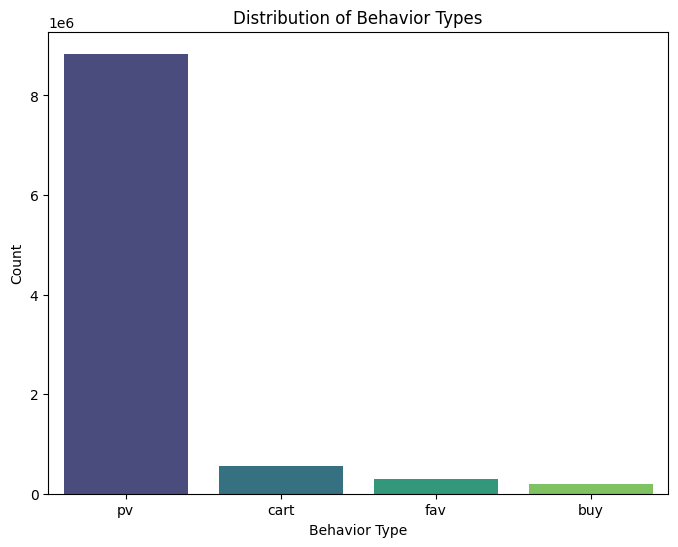


独立用户数量: 97,809
独立商品数量: 1,550,844
独立商品类目数量: 7,951


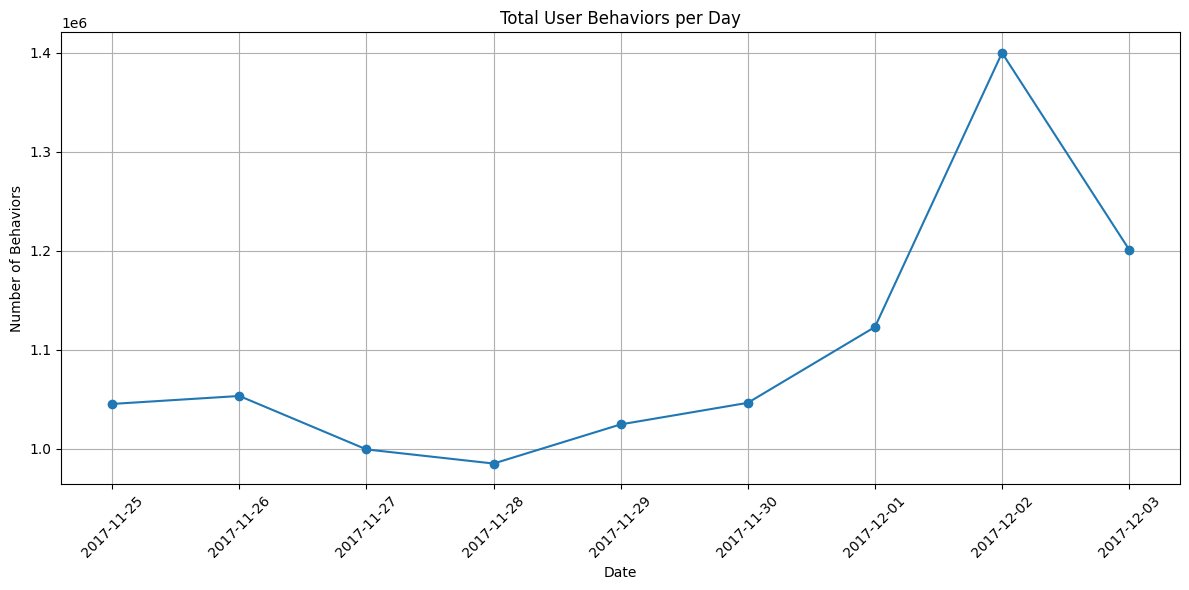

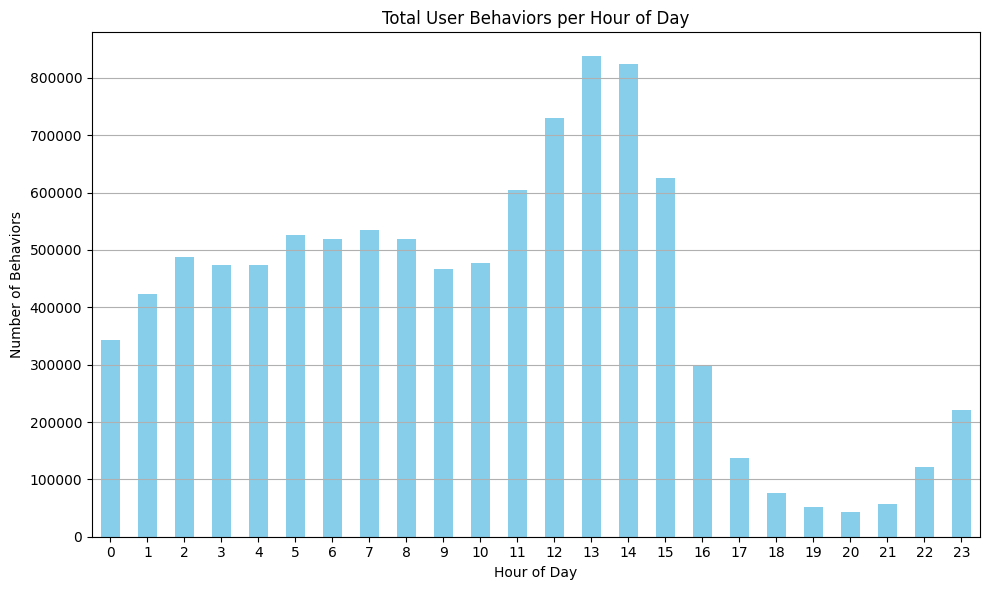

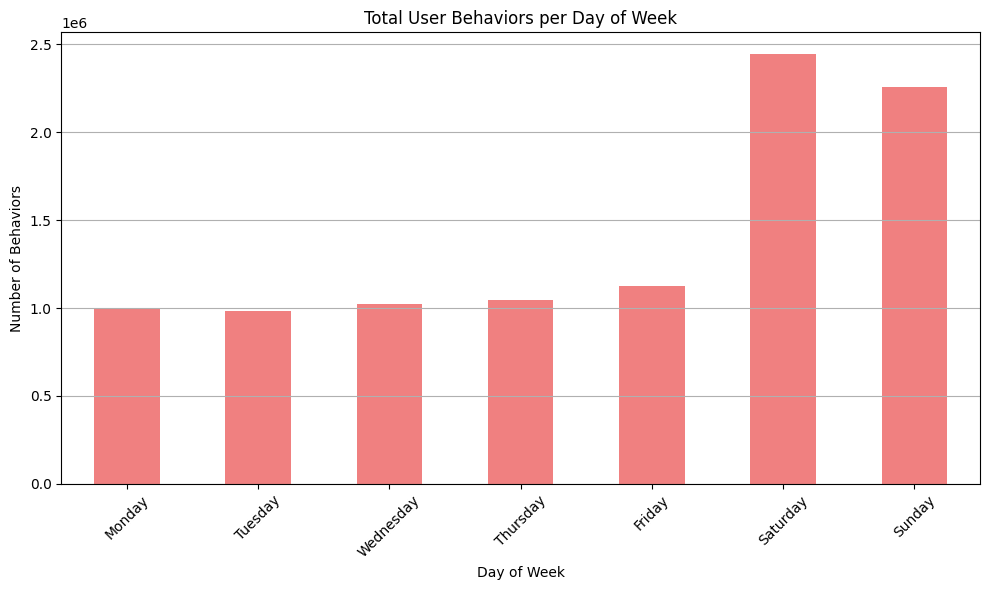


--- 4. 初步的多变量分析与热门分析 ---

Top 10 Most Viewed Items (PV):
812879     2941
3845720    2511
2032668    2068
138964     2028
2331370    1987
3031354    1808
2338453    1778
1535294    1764
4211339    1729
59883      1716
Name: item_id, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_29316\2608928515.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items_pv.index, y=top_items_pv.values, order=top_items_pv.index, palette='coolwarm')


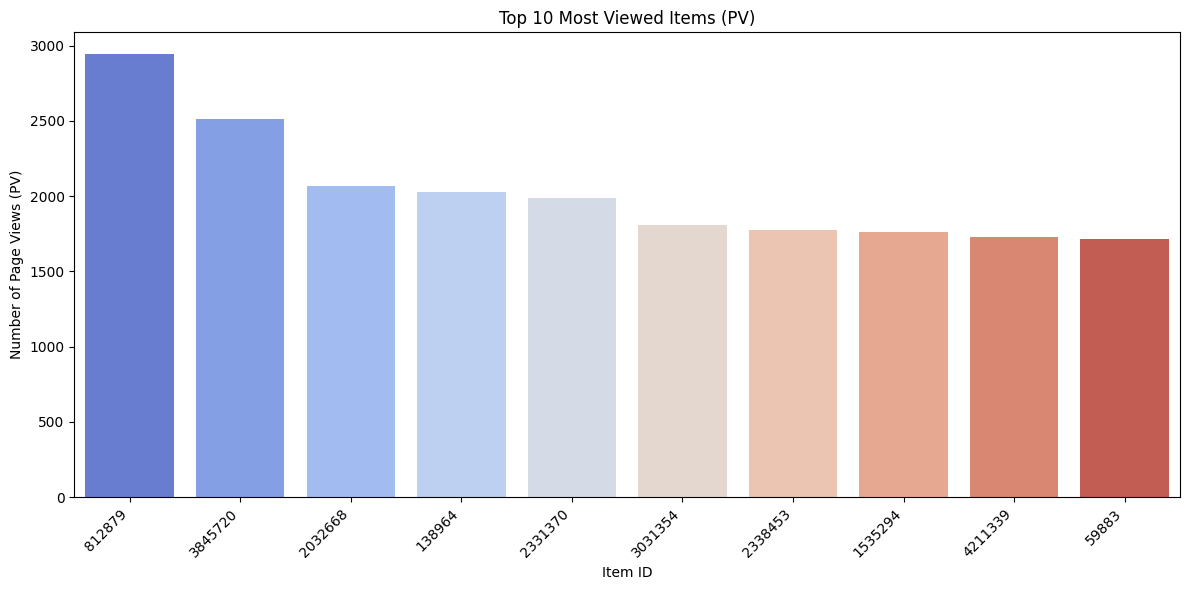


Top 10 Most Viewed Categories (PV):
4756105    478455
4145813    322614
2355072    312967
3607361    293164
982926     283172
2520377    197556
4801426    186675
1320293    174916
2465336    154782
3002561    142784
Name: category_id, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_29316\2608928515.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories_pv.index, y=top_categories_pv.values, order=top_categories_pv.index, palette='autumn')


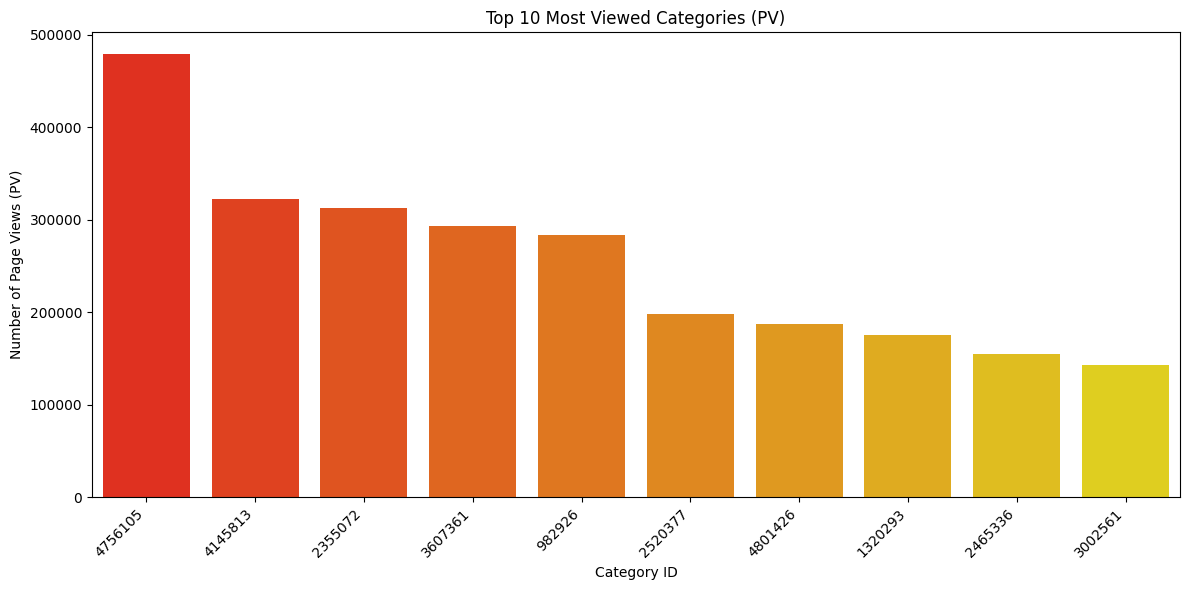


Top 10 Most Purchased Items:
3122135    134
3031354     78
2964774     74
1910706     68
1116492     59
2560262     59
3964583     56
1415828     54
1168232     53
3189426     52
Name: item_id, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_29316\2608928515.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items_buy.index, y=top_items_buy.values, order=top_items_buy.index, palette='winter')


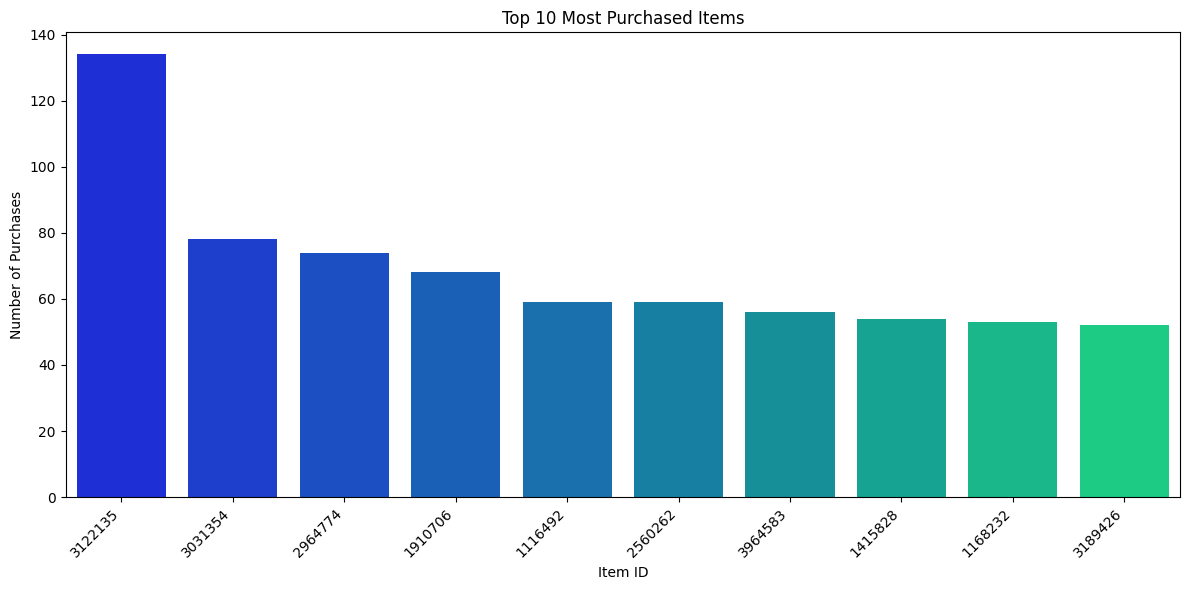

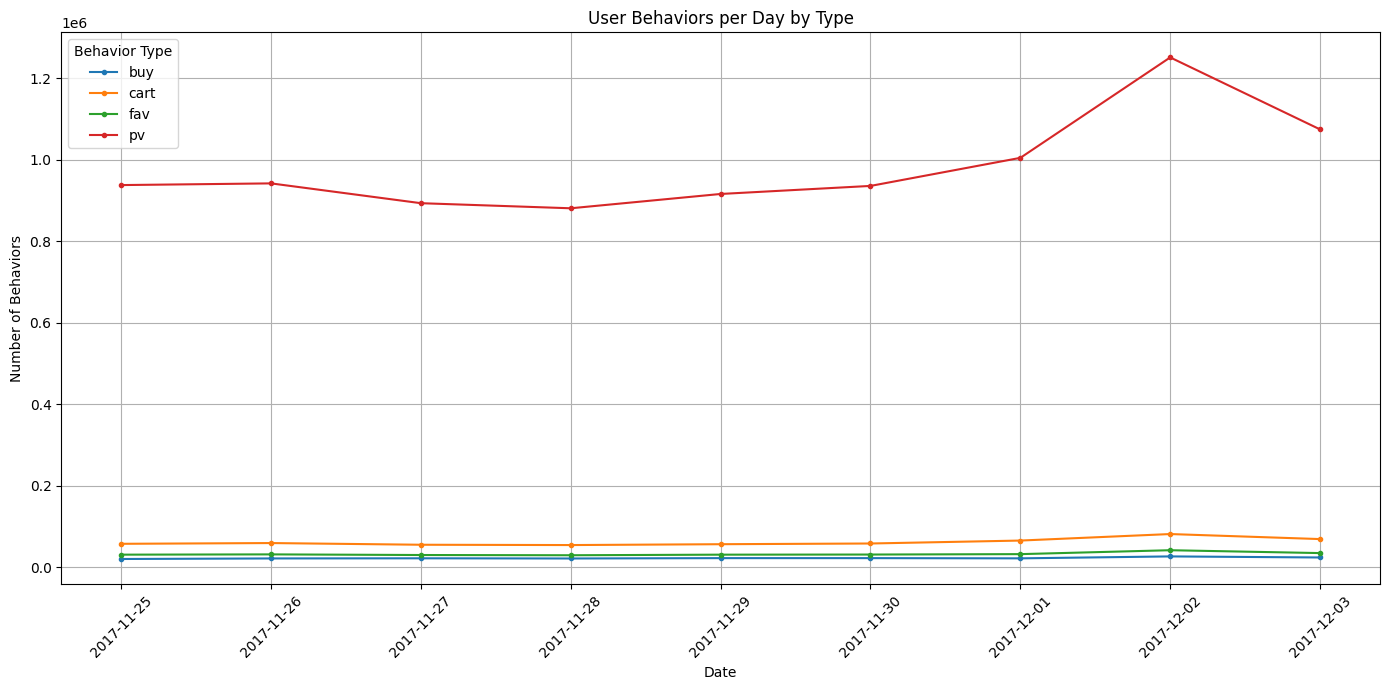

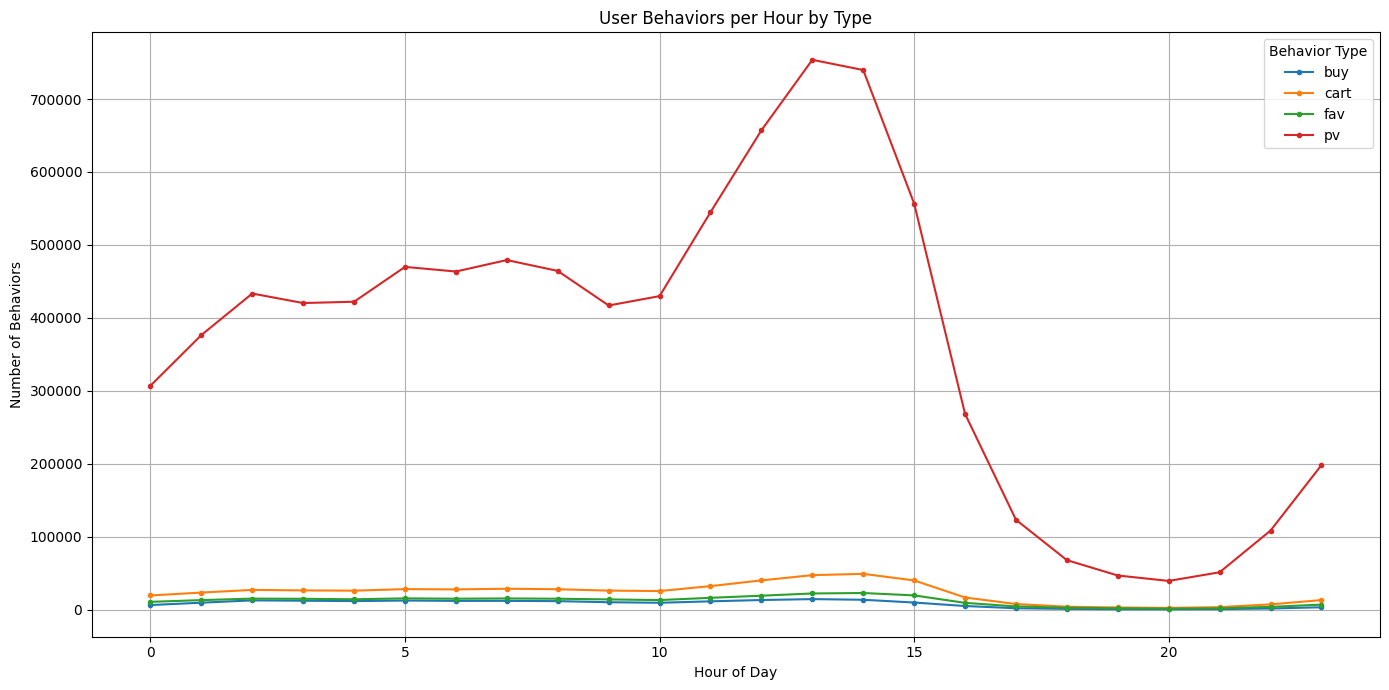


--- 5. 用户行为分析 (初步) ---

每个用户平均行为次数: 100.98
用户行为次数中位数: 75.00


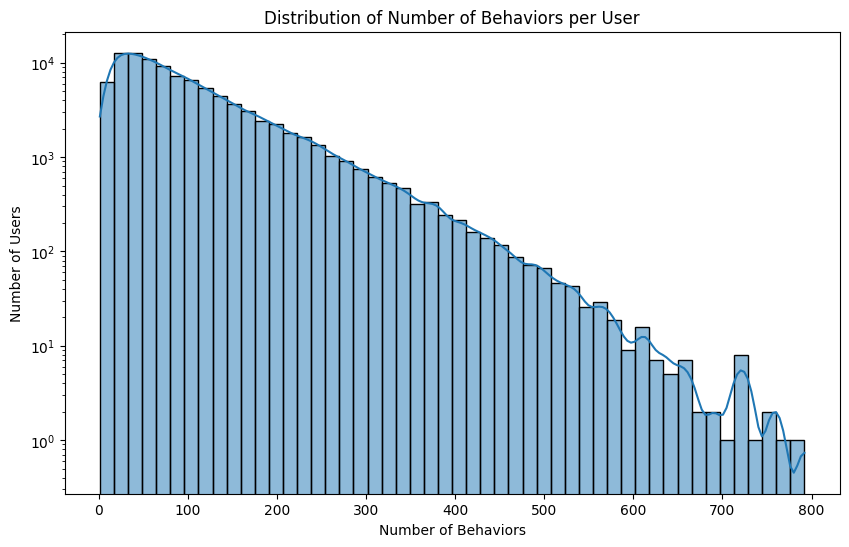


Top 10 Active Users (by total behaviors):
user_id
419460    792
435009    764
381457    758
115477    755
221012    730
513232    728
142071    727
323775    724
535123    720
116139    719
Name: behavior_type, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_29316\2608928515.py:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_active_users.index, y=top_active_users.values, order=top_active_users.index, palette="crest")


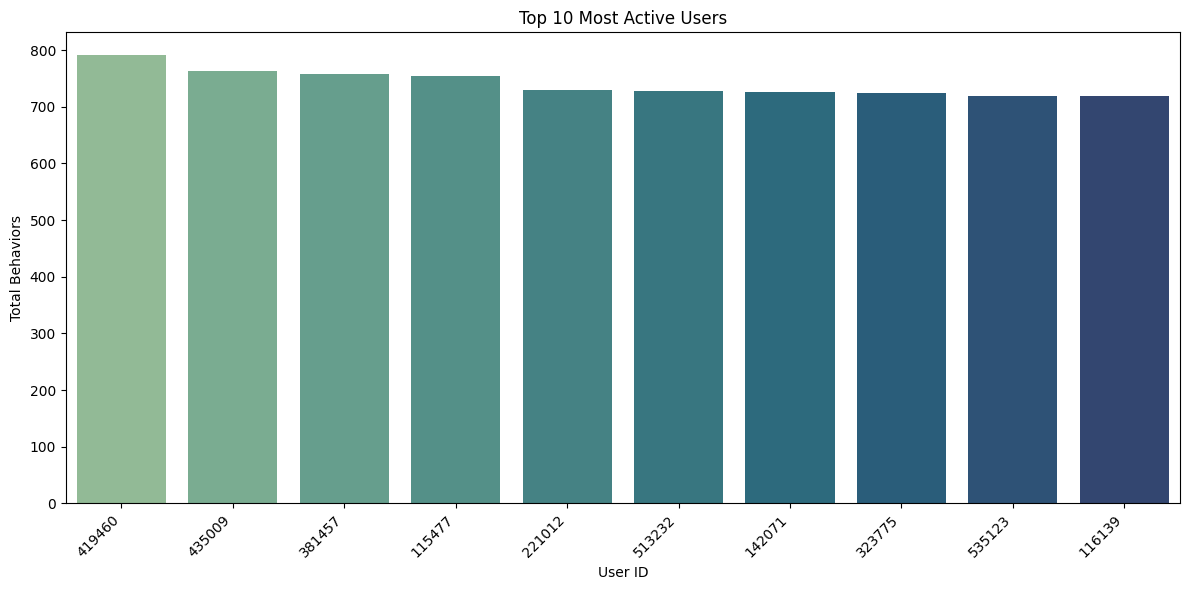


全局 PV 到 Buy 的大致比例: 2.24% (基于当前加载的子集)

--- 6. 总结与后续步骤提示 ---
探索性数据分析初步完成。主要发现包括：
- 数据集包含从 2017-11-25 到 2017-12-03 的用户行为。
- 最常见的用户行为是 'pv' (PV)，占比最高。
- 用户行为在一天中的高峰期通常在晚上，周末可能会有不同的模式。
- 识别出了最受欢迎的商品和类目（基于PV和购买）。
- 用户活跃度呈现长尾分布，少数用户贡献了大量行为。

后续可以进行的分析：
1. 如果内存允许，使用完整数据集进行分析以获得更准确的全局统计。
2. 深入分析用户行为序列，例如：用户在购买前的平均PV次数、平均加购次数等。
3. 构建用户-商品交互矩阵，为协同过滤等推荐算法做准备。
4. 进行更复杂的用户分群（例如基于RFM模型或行为模式）。
5. 探索商品之间的关联性（例如购买了A也购买了B的商品）。
6. 针对项目要求，开始特征工程，为序列模型（LSTM/Transformer）准备数据。

EDA代码执行完毕。


In [2]:
# --- 3. 单变量分析 ---
print("\n--- 3. 单变量分析 ---")

# 3.1 行为类型分布
print("\n行为类型分布:")
behavior_counts = df['behavior_type'].value_counts()
print(behavior_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=behavior_counts.index, y=behavior_counts.values, palette='viridis')
plt.title('Distribution of Behavior Types')
plt.xlabel('Behavior Type')
plt.ylabel('Count')
plt.show()

# 3.2 独立实体数量统计
unique_users = df['user_id'].nunique()
unique_items = df['item_id'].nunique()
unique_categories = df['category_id'].nunique()
print(f"\n独立用户数量: {unique_users:,}")
print(f"独立商品数量: {unique_items:,}")
print(f"独立商品类目数量: {unique_categories:,}")
# 注意：这些是基于加载的子集的统计，完整数据集的统计会更大。

# 3.3 时间序列分析 - 按天统计用户行为总量
daily_behavior_counts = df.groupby('date')['user_id'].count()
plt.figure(figsize=(12, 6))
daily_behavior_counts.plot(kind='line', marker='o')
plt.title('Total User Behaviors per Day')
plt.xlabel('Date')
plt.ylabel('Number of Behaviors')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3.4 时间序列分析 - 按小时统计用户行为总量
hourly_behavior_counts = df.groupby('hour')['user_id'].count()
plt.figure(figsize=(10, 6))
hourly_behavior_counts.plot(kind='bar', color='skyblue')
plt.title('Total User Behaviors per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Behaviors')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 3.5 时间序列分析 - 按星期几统计用户行为总量
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_behavior_counts = df.groupby('weekday')['user_id'].count().reindex(weekday_order)
plt.figure(figsize=(10, 6))
weekday_behavior_counts.plot(kind='bar', color='lightcoral')
plt.title('Total User Behaviors per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Behaviors')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- 4. 初步的多变量分析与热门分析 ---
print("\n--- 4. 初步的多变量分析与热门分析 ---")

# 4.1 Top N 商品 (基于PV行为)
# 我们通常关心的是被浏览次数最多的商品
top_n = 10
pv_df = df[df['behavior_type'] == 'pv']
top_items_pv = pv_df['item_id'].value_counts().head(top_n)
print(f"\nTop {top_n} Most Viewed Items (PV):")
print(top_items_pv)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_items_pv.index, y=top_items_pv.values, order=top_items_pv.index, palette='coolwarm')
plt.title(f'Top {top_n} Most Viewed Items (PV)')
plt.xlabel('Item ID')
plt.ylabel('Number of Page Views (PV)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4.2 Top N 商品类目 (基于PV行为)
top_categories_pv = pv_df['category_id'].value_counts().head(top_n)
print(f"\nTop {top_n} Most Viewed Categories (PV):")
print(top_categories_pv)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories_pv.index, y=top_categories_pv.values, order=top_categories_pv.index, palette='autumn')
plt.title(f'Top {top_n} Most Viewed Categories (PV)')
plt.xlabel('Category ID')
plt.ylabel('Number of Page Views (PV)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4.3 Top N 购买的商品
buy_df = df[df['behavior_type'] == 'buy']
top_items_buy = buy_df['item_id'].value_counts().head(top_n)
print(f"\nTop {top_n} Most Purchased Items:")
print(top_items_buy)

if not top_items_buy.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_items_buy.index, y=top_items_buy.values, order=top_items_buy.index, palette='winter')
    plt.title(f'Top {top_n} Most Purchased Items')
    plt.xlabel('Item ID')
    plt.ylabel('Number of Purchases')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("在加载的子集中没有 'buy' 行为，无法绘制Top Purchased Items图。")


# 4.4 不同行为类型在每天的分布
behaviors_by_date_type = df.groupby(['date', 'behavior_type'])['user_id'].count().unstack('behavior_type').fillna(0)
# unstack 将 behavior_type 从索引提升为列

# 绘制堆叠条形图或折线图
behaviors_by_date_type.plot(kind='line', figsize=(14, 7), marker='.')
plt.title('User Behaviors per Day by Type')
plt.xlabel('Date')
plt.ylabel('Number of Behaviors')
plt.xticks(rotation=45)
plt.legend(title='Behavior Type')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4.5 不同行为类型在每小时的分布
behaviors_by_hour_type = df.groupby(['hour', 'behavior_type'])['user_id'].count().unstack('behavior_type').fillna(0)
behaviors_by_hour_type.plot(kind='line', figsize=(14, 7), marker='.') # 或者 kind='bar', stacked=True
plt.title('User Behaviors per Hour by Type')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Behaviors')
plt.legend(title='Behavior Type')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 5. 用户行为分析 (初步) ---
print("\n--- 5. 用户行为分析 (初步) ---")

# 5.1 用户平均行为次数
user_behavior_counts = df.groupby('user_id')['behavior_type'].count()
print(f"\n每个用户平均行为次数: {user_behavior_counts.mean():.2f}")
print(f"用户行为次数中位数: {user_behavior_counts.median():.2f}")

plt.figure(figsize=(10, 6))
sns.histplot(user_behavior_counts, bins=50, kde=True) # 查看分布，可能会非常偏斜
plt.title('Distribution of Number of Behaviors per User')
plt.xlabel('Number of Behaviors')
plt.ylabel('Number of Users')
plt.yscale('log') # 由于长尾效应，使用对数刻度可能更好
plt.show()

# 5.2 活跃用户 (Top N 用户按行为总数)
top_active_users = user_behavior_counts.sort_values(ascending=False).head(top_n)
print(f"\nTop {top_n} Active Users (by total behaviors):")
print(top_active_users)

plt.figure(figsize=(12,6))
sns.barplot(x=top_active_users.index, y=top_active_users.values, order=top_active_users.index, palette="crest")
plt.title(f"Top {top_n} Most Active Users")
plt.xlabel("User ID")
plt.ylabel("Total Behaviors")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5.3 转化率分析 (PV -> Buy) - 这是一个简化的全样本概念，对于子集可能不准确
# 真实的转化率需要更细致的定义（比如session内转化，或特定时间窗口内转化）
# 此处计算的是全局的 PV 和 Buy 的比例

total_pv = behavior_counts.get('pv', 0)
total_buy = behavior_counts.get('buy', 0)

if total_pv > 0:
    pv_to_buy_ratio = (total_buy / total_pv) * 100 if total_pv > 0 else 0
    print(f"\n全局 PV 到 Buy 的大致比例: {pv_to_buy_ratio:.2f}% (基于当前加载的子集)")
else:
    print("\n在加载的子集中没有 'pv' 行为，无法计算 PV 到 Buy 的比例。")

# 对于更精确的转化率，通常需要分析单个用户的行为序列
# 例如：有多少用户在浏览了商品X后最终购买了商品X

# --- 6. 总结与后续步骤提示 ---
print("\n--- 6. 总结与后续步骤提示 ---")
print("探索性数据分析初步完成。主要发现包括：")
print(f"- 数据集包含从 {df['date'].min()} 到 {df['date'].max()} 的用户行为。")
print(f"- 最常见的用户行为是 '{behavior_counts.index[0]}' (PV)，占比最高。")
print(f"- 用户行为在一天中的高峰期通常在晚上，周末可能会有不同的模式。")
print(f"- 识别出了最受欢迎的商品和类目（基于PV和购买）。")
print(f"- 用户活跃度呈现长尾分布，少数用户贡献了大量行为。")

print("\n后续可以进行的分析：")
print("1. 如果内存允许，使用完整数据集进行分析以获得更准确的全局统计。")
print("2. 深入分析用户行为序列，例如：用户在购买前的平均PV次数、平均加购次数等。")
print("3. 构建用户-商品交互矩阵，为协同过滤等推荐算法做准备。")
print("4. 进行更复杂的用户分群（例如基于RFM模型或行为模式）。")
print("5. 探索商品之间的关联性（例如购买了A也购买了B的商品）。")
print("6. 针对项目要求，开始特征工程，为序列模型（LSTM/Transformer）准备数据。")

print("\nEDA代码执行完毕。")


--- 7. 用户行为序列构建与初步分析 ---
DataFrame 'df' 已加载，继续进行序列构建。
待处理数据量: 9,876,427 条

按用户ID和时间戳排序数据...
数据排序完成。

为每个用户构建行为序列 (item_id, behavior_type, category_id, timestamp_dt)...
成功为 97,809 个用户构建了行为序列。

用户行为序列示例 (前3个用户):
   user_id                                      item_sequence  \
0        1  [2576651, 3830808, 4365585, 4606018, 230380, 3...   
1        5  [890088, 1571034, 1126959, 1228139, 842974, 39...   
2       13  [4866028, 821005, 3773943, 1725963, 755466, 17...   

                                   behavior_sequence  \
0  [pv, pv, pv, pv, pv, pv, pv, pv, pv, pv, pv, p...   
1  [pv, pv, pv, pv, pv, pv, pv, pv, pv, pv, pv, p...   
2  [pv, pv, cart, pv, pv, pv, pv, cart, pv, cart,...   

                                   category_sequence  \
0  [149192, 4181361, 2520377, 2735466, 411153, 29...   
1  [2355072, 2355072, 982926, 982926, 3002561, 34...   
2  [982926, 3645362, 672001, 672001, 672001, 2982...   

                                  timestamp_sequence  
0  [2017-11-25 01:21:25

C:\Users\86155\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


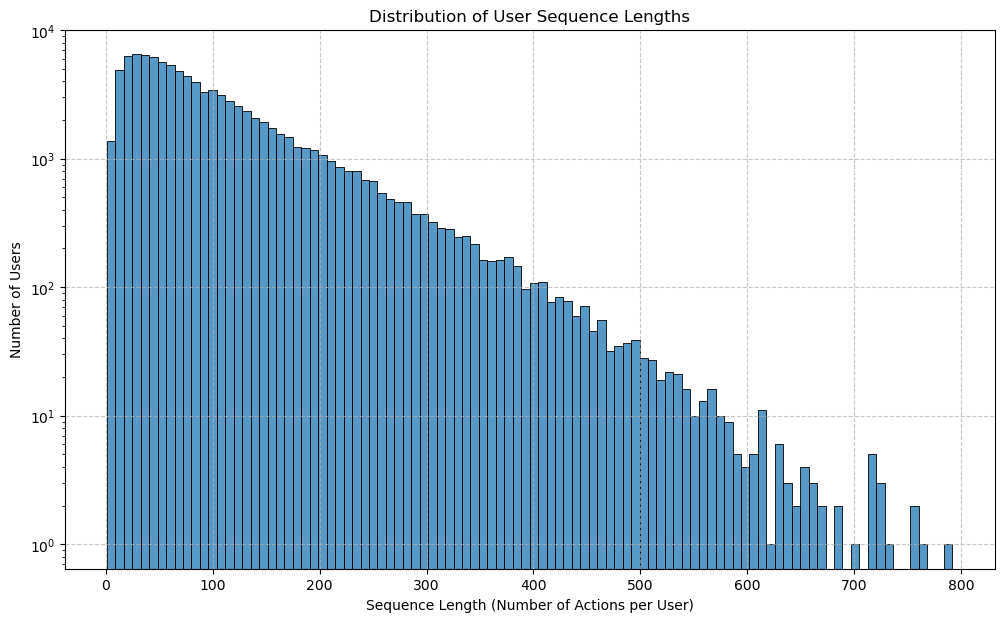


序列长度等于1的用户数量: 5

在观察期内总用户数: 97,809
有购买行为的用户数量: 66,248 (67.73%)

购买用户 vs 未购买用户的平均序列长度:
has_purchase
False     79.161212
True     111.369702
Name: sequence_length, dtype: float64


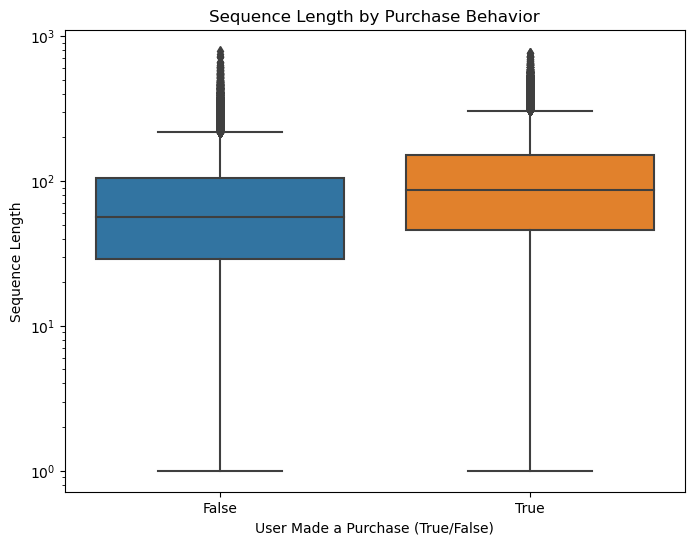


首次购买前行为次数的描述性统计 (针对有购买的用户):
count    66248.000000
mean        36.761970
std         45.538246
min          0.000000
25%          8.000000
50%         21.000000
75%         48.000000
max        763.000000
Name: actions_before_first_buy, dtype: float64


C:\Users\86155\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


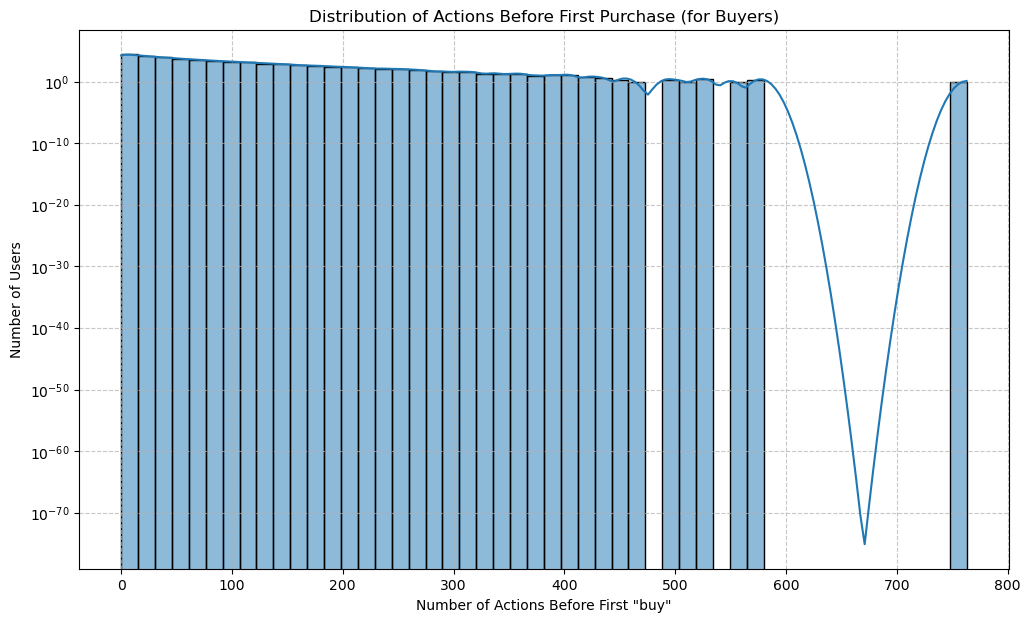


--- 8. 基于序列的特征工程 ---
从用户行为序列中提取更多特征...
计算每种行为类型的次数...
计算交互的独立商品数和类目数...
计算用户粒度的PV到BUY转化率...

包含序列特征的用户数据示例 (前3行，部分列):
   user_id  sequence_length  has_purchase  pv_count  cart_count  fav_count  \
0        1               53         False        53           0          0   
1        5               64         False        64           0          0   
2       13               11         False         7           4          0   

   buy_count  unique_items_count  unique_categories_count  \
0          0                  44                       20   
1          0                  58                       29   
2          0                  10                        7   

   user_pv_to_buy_conversion_rate  
0                             0.0  
1                             0.0  
2                             0.0  

序列特征描述性统计:
       sequence_length      pv_count    cart_count     fav_count  \
count     97809.000000  97809.000000  97809.000000  97809.000000   
mean        100.976669     90.3

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np # 引入numpy用于处理可能的NaN值

# (这里假设你之前的代码已经运行完毕，并且我们有一个名为 df 的DataFrame)
# df 包含了 'user_id', 'item_id', 'category_id', 'behavior_type', 'timestamp',
# 'timestamp_dt', 'date', 'hour', 'weekday' 这些列，并且数据已经是筛选和清洗过的。


# --- 7. 用户行为序列构建与初步分析 ---
print("\n--- 7. 用户行为序列构建与初步分析 ---")

if 'df' not in locals() or df.empty:
    print("错误：DataFrame 'df' 未定义或为空。请确保之前的EDA代码已成功运行并生成了 'df'。")
    # exit() # 在实际流程中，如果df不存在，应该停止
else:
    print("DataFrame 'df' 已加载，继续进行序列构建。")
    print(f"待处理数据量: {len(df):,} 条")

    # 7.1 确保数据按照用户ID和时间戳排序
    print("\n按用户ID和时间戳排序数据...")
    df_sorted = df.sort_values(by=['user_id', 'timestamp_dt'], ascending=True)
    print("数据排序完成。")

    # 7.2 为每个用户构建行为序列
    print("\n为每个用户构建行为序列 (item_id, behavior_type, category_id, timestamp_dt)...")
    # 使用 groupby 和 agg(list) 来创建序列
    # 注意：对于亿级数据，此操作可能非常消耗内存和时间。
    # 如果遇到性能问题，可以考虑：
    # 1. 增加机器内存。
    # 2. 采用更节省内存的方法（如迭代处理或Dask等并行计算库）。
    # 3. 进一步抽样用户进行分析。
    user_sequences = df_sorted.groupby('user_id').agg(
        item_sequence=('item_id', list),
        behavior_sequence=('behavior_type', list),
        category_sequence=('category_id', list),
        timestamp_sequence=('timestamp_dt', list)
    ).reset_index()

    print(f"成功为 {len(user_sequences):,} 个用户构建了行为序列。")
    print("\n用户行为序列示例 (前3个用户):")
    print(user_sequences.head(3))

    # 7.3 初步分析行为序列
    # 7.3.1 序列长度分析 (即每个用户的总行为次数)
    user_sequences['sequence_length'] = user_sequences['item_sequence'].apply(len)

    print("\n序列长度描述性统计:")
    print(user_sequences['sequence_length'].describe())

    plt.figure(figsize=(12, 7))
    sns.histplot(user_sequences['sequence_length'], bins=100, kde=False)
    plt.title('Distribution of User Sequence Lengths')
    plt.xlabel('Sequence Length (Number of Actions per User)')
    plt.ylabel('Number of Users')
    plt.yscale('log') # 序列长度通常也是长尾分布
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    print(f"\n序列长度等于1的用户数量: {len(user_sequences[user_sequences['sequence_length'] == 1]):,}")
    # 考虑是否移除序列过短的用户，比如只进行了一次操作的用户，对序列分析意义不大
    # min_sequence_length = 2 # 或更高
    # user_sequences_filtered = user_sequences[user_sequences['sequence_length'] >= min_sequence_length]
    # print(f"移除长度小于 {min_sequence_length} 的序列后，剩余用户: {len(user_sequences_filtered):,}")

    # 7.3.2 分析序列中是否包含购买行为
    def has_purchase(behavior_list):
        return 'buy' in behavior_list

    user_sequences['has_purchase'] = user_sequences['behavior_sequence'].apply(has_purchase)
    purchase_user_count = user_sequences['has_purchase'].sum()
    total_users_in_sequences = len(user_sequences)
    purchase_percentage = (purchase_user_count / total_users_in_sequences) * 100 if total_users_in_sequences > 0 else 0
    print(f"\n在观察期内总用户数: {total_users_in_sequences:,}")
    print(f"有购买行为的用户数量: {purchase_user_count:,} ({purchase_percentage:.2f}%)")

    # 购买用户 vs 未购买用户的平均序列长度
    print("\n购买用户 vs 未购买用户的平均序列长度:")
    print(user_sequences.groupby('has_purchase')['sequence_length'].mean())
    
    plt.figure(figsize=(8,6))
    sns.boxplot(x='has_purchase', y='sequence_length', data=user_sequences)
    plt.title('Sequence Length by Purchase Behavior')
    plt.xlabel('User Made a Purchase (True/False)')
    plt.ylabel('Sequence Length')
    plt.yscale('log') # 因为序列长度差异大
    plt.show()


    # 7.3.3 首次购买行为前的行为次数 (对于有购买的用户)
    def actions_before_first_purchase(row):
        if not row['has_purchase']:
            return np.nan # 使用 np.nan 以便后续 describe 和 dropna 能正确处理
        try:
            # 找到第一个 'buy' 的索引
            first_purchase_index = row['behavior_sequence'].index('buy')
            return first_purchase_index # 这就是之前的行为数量 (0-indexed)
        except ValueError: # 'buy' 不在列表中, 理论上如果 has_purchase 为 True 不会发生
            return np.nan

    # 只对有购买行为的用户计算
    user_sequences_with_purchase = user_sequences[user_sequences['has_purchase']].copy() # 使用 .copy() 避免 SettingWithCopyWarning
    if not user_sequences_with_purchase.empty:
        user_sequences_with_purchase['actions_before_first_buy'] = user_sequences_with_purchase.apply(actions_before_first_purchase, axis=1)
        
        print("\n首次购买前行为次数的描述性统计 (针对有购买的用户):")
        print(user_sequences_with_purchase['actions_before_first_buy'].describe())

        plt.figure(figsize=(12, 7))
        sns.histplot(user_sequences_with_purchase['actions_before_first_buy'].dropna(), bins=50, kde=True)
        plt.title('Distribution of Actions Before First Purchase (for Buyers)')
        plt.xlabel('Number of Actions Before First "buy"')
        plt.ylabel('Number of Users')
        plt.yscale('log')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("\n在分析的用户中没有发生购买行为，无法分析购买前行为次数。")

    # --- 8. 基于序列的特征工程 (为用户分群和推荐做准备) ---
    print("\n--- 8. 基于序列的特征工程 ---")
    print("从用户行为序列中提取更多特征...")

    # 8.1 各种行为类型的计数
    print("计算每种行为类型的次数...")
    behavior_types = ['pv', 'cart', 'fav', 'buy']
    for b_type in behavior_types:
        user_sequences[f'{b_type}_count'] = user_sequences['behavior_sequence'].apply(lambda x: x.count(b_type))

    # 8.2 交互的独立商品数和类目数
    print("计算交互的独立商品数和类目数...")
    user_sequences['unique_items_count'] = user_sequences['item_sequence'].apply(lambda x: len(set(x)))
    user_sequences['unique_categories_count'] = user_sequences['category_sequence'].apply(lambda x: len(set(x)))
    
    # 8.3 购买转化率 (对于每个用户，简单定义为 buy_count / pv_count)
    # (注意：如果pv_count为0，会出现除零错误，需处理)
    print("计算用户粒度的PV到BUY转化率...")
    user_sequences['user_pv_to_buy_conversion_rate'] = user_sequences.apply(
        lambda row: (row['buy_count'] / row['pv_count'] * 100) if row['pv_count'] > 0 else 0, axis=1
    )
    # 对于没有购买行为的用户，此转化率为0
    
    print("\n包含序列特征的用户数据示例 (前3行，部分列):")
    columns_to_show = ['user_id', 'sequence_length', 'has_purchase',
                       'pv_count', 'cart_count', 'fav_count', 'buy_count',
                       'unique_items_count', 'unique_categories_count', 'user_pv_to_buy_conversion_rate']
    # 如果 actions_before_first_buy 列存在于 user_sequences_with_purchase 而不是 user_sequences
    # 则需要合并或者只显示 user_sequences 中的列
    # 为了简单，我们只显示 user_sequences 中已有的列
    print(user_sequences[columns_to_show].head(3))

    print("\n序列特征描述性统计:")
    print(user_sequences[columns_to_show[1:]].describe()) # 从sequence_length开始

    # --- 9. 下一步工作方向提示 ---
    print("\n--- 9. 下一步工作方向提示 ---")
    print("用户行为序列已构建，并提取了相关特征。现在可以进行：")
    print("1. **用户分群 (User Segmentation)**:")
    print("   - 使用 'sequence_length', 'pv_count', 'buy_count', 'unique_items_count', 'user_pv_to_buy_conversion_rate' 等特征。")
    print("   - 应用聚类算法如 K-Means，分析不同用户群体的画像和行为模式。")
    print("2. **为序列模型准备输入 (如 LSTM/Transformer)**:")
    print("   - 对 `item_sequence` 进行padding/truncation，统一长度。")
    print("   - 将 item_id (和 category_id) 映射为整数索引，然后可能通过 Embedding 层转换为向量。")
    print("   - 构建 (X, y) 对，例如用历史行为序列预测下一个行为或下一个购买的商品。")
    print("3. **构建其他类型的推荐模型**:")
    print("   - **协同过滤**: 从原始的 `df`（用户-商品-行为）可以构建用户-商品交互矩阵。ItemCF, UserCF。")
    print("   - **基于内容的推荐**: 如果有商品的内容特征（本数据集不直接提供，但类目ID是弱内容特征）。")
    print("4. **深入分析用户兴趣演变**: (需要更细致的时间窗口分析)")
    print("   - 分析用户在不同时间段内关注的商品/类目变化。")
    print("   - 用户从浏览到最终购买的典型路径和时长。")

    print("\n序列构建、初步分析与特征工程完成。")


--- 10. 用户分群 (User Segmentation) ---
DataFrame 'user_sequences' 已加载，继续进行用户分群。
待处理用户数: 97,809

选择的聚类特征: ['sequence_length', 'pv_count', 'cart_count', 'fav_count', 'buy_count', 'unique_items_count', 'unique_categories_count', 'user_pv_to_buy_conversion_rate']

对特征进行标准化处理...
标准化完成。

确定最优聚类数量 K...
计算不同K值的惯性 (Inertia) - 肘部法则:
  K=2, Inertia=516961.40
  K=3, Inertia=447323.55
  K=4, Inertia=406093.00
  K=5, Inertia=357493.27
  K=6, Inertia=324644.65
  K=7, Inertia=300399.61
  K=8, Inertia=280212.10
  K=9, Inertia=261870.78
  K=10, Inertia=247496.94


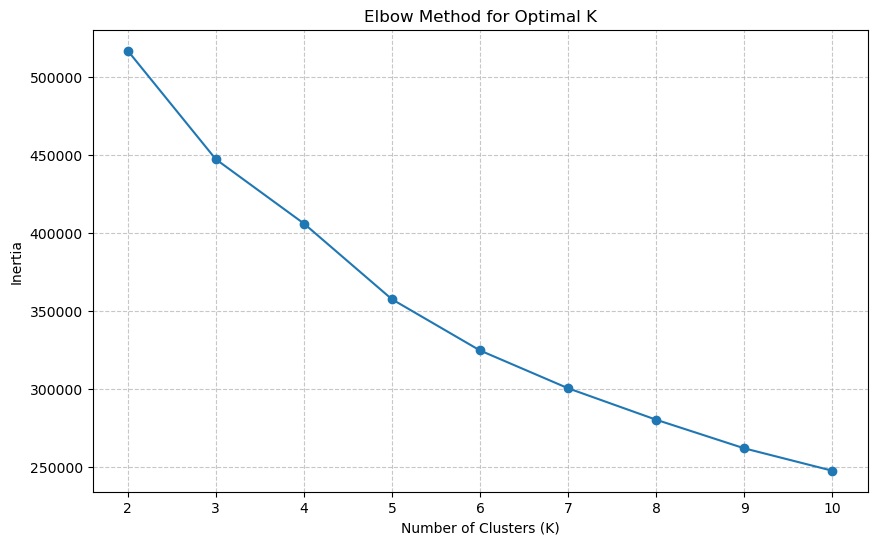

根据肘部法则图和轮廓系数图 (如果已生成)，请输入期望的聚类数量 K (例如 3, 4, 或 5): 5
选择的聚类数量 K = 5

应用 K-Means 算法进行聚类 (K=5)...
聚类完成，并将标签添加到DataFrame。

带有聚类标签的用户数据示例 (部分列):
   user_id  sequence_length  buy_count  user_pv_to_buy_conversion_rate  \
0        1               53          0                             0.0   
1        5               64          0                             0.0   
2       13               11          0                             0.0   
3       19               75          0                             0.0   
4       21              317          0                             0.0   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        4  

分析聚类结果...

各簇的用户数量:
cluster
0    54413
1     3011
2    31545
3       18
4     8822
Name: count, dtype: int64


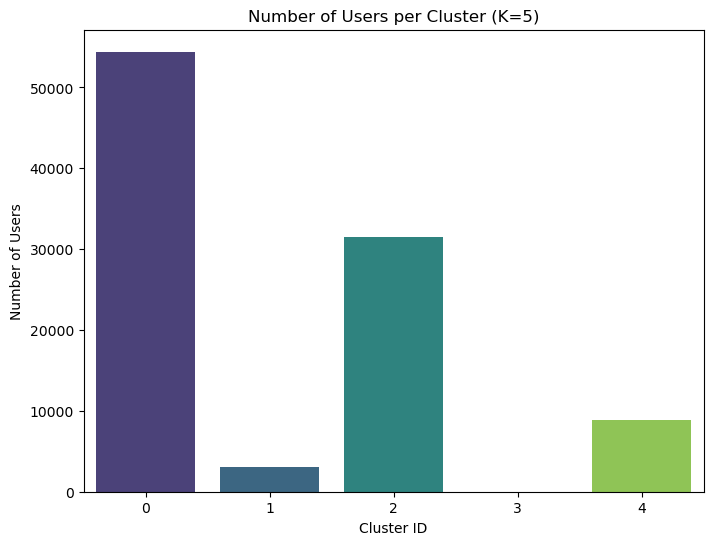


各簇的特征均值 (用于画像分析):
         sequence_length    pv_count  cart_count  fav_count  buy_count  \
cluster                                                                  
0              45.229210   40.108614    2.614320   1.206881   1.299395   
1             240.675523  197.028230    6.363999  34.530056   2.753238   
2             131.905754  118.717007    7.740149   2.828404   2.620193   
3              32.166667    1.666667    9.500000   8.888889  12.111111   
4             286.686692  262.702222   16.670483   3.270347   4.043641   

         unique_items_count  unique_categories_count  \
cluster                                                
0                 35.636668                14.423042   
1                175.353703                45.579210   
2                 99.984720                31.683880   
3                 28.666667                19.111111   
4                213.322489                52.514509   

         user_pv_to_buy_conversion_rate  
cluster                    

<Figure size 1500x1000 with 0 Axes>

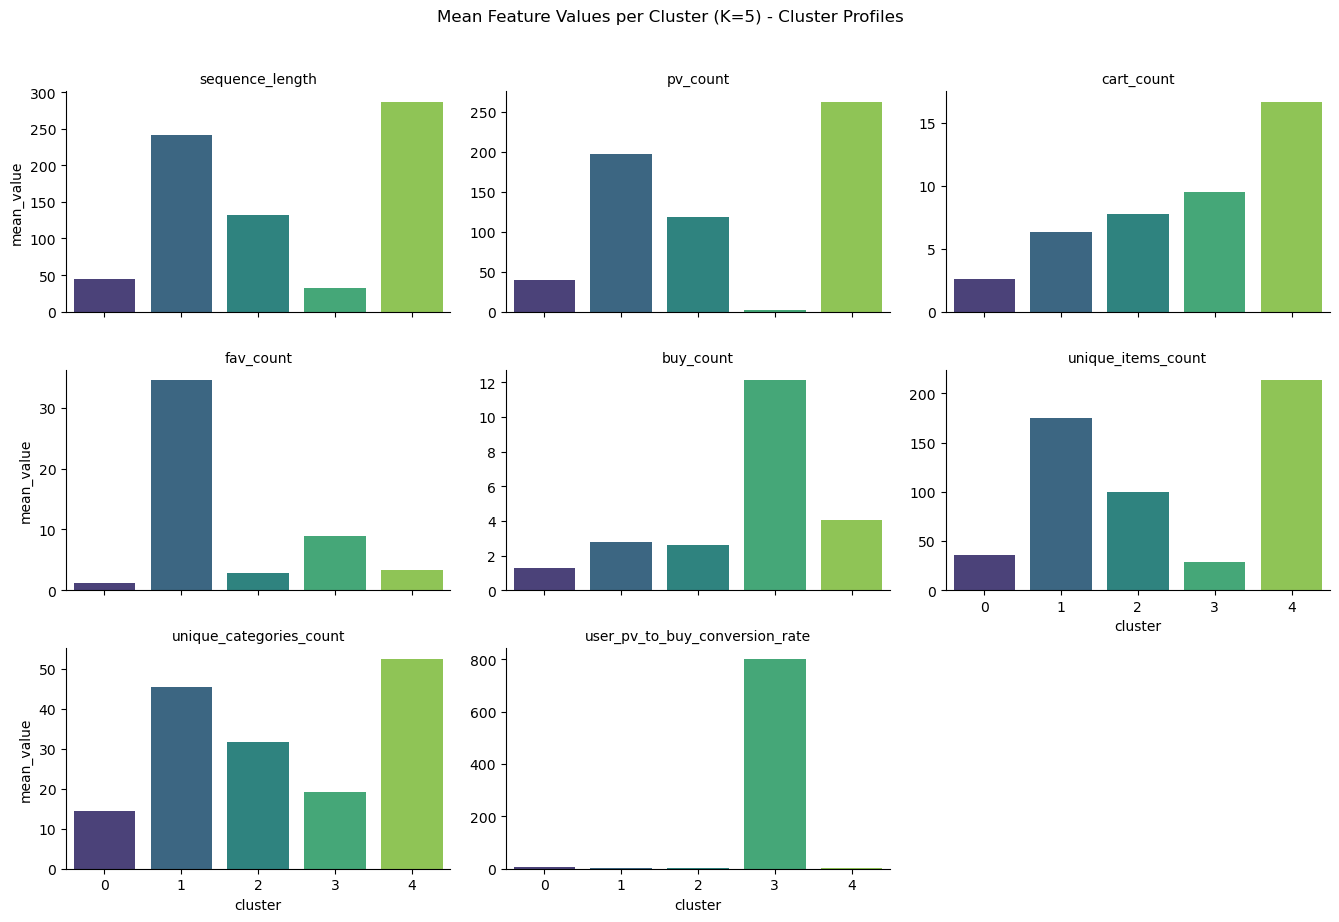


用户分群完成。可以根据各簇的特征均值来解读每个用户群体的特点。
例如：
- 是否有高活跃度但低转化率的“浏览型”用户群？
- 是否有购买次数多、转化率高的“价值型”用户群？
- 是否有各项指标都偏低的“低频”或“新”用户群？

--- 11. 下一步工作方向提示 (基于分群结果) ---
用户分群完成后，可以进行：
1. **用户画像细化与命名**: 根据每个簇的特征，为它们赋予有意义的名称（如“高价值买家”、“潜力股”、“浏览党”等）。
2. **针对不同用户群制定策略**: 
   - 对高价值用户：提供VIP服务、忠诚度计划。
   - 对潜力用户：通过精准推荐促进转化。
   - 对浏览型用户：优化内容展示，引导兴趣点。
3. **为序列模型准备数据时考虑用户群**: 
   - 可以为不同用户群分别训练模型，或者将用户群信息作为特征输入到统一模型中。
4. **比较不同用户群在推荐算法下的表现**: 检验推荐系统对不同类型用户的有效性。
5. **深入分析特定用户群的行为序列**: 例如，高转化用户的典型购买路径是怎样的？

用户分群及初步画像分析完成。


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

# 忽略一些FutureWarning，确保输出整洁
warnings.filterwarnings("ignore", category=FutureWarning)

# (这里假设你之前的代码已经运行完毕，并且我们有一个名为 user_sequences 的DataFrame)
# user_sequences 包含了 'user_id', 'item_sequence', 'behavior_sequence', ...,
# 以及 'sequence_length', 'pv_count', 'cart_count', 'fav_count', 'buy_count',
# 'unique_items_count', 'unique_categories_count', 'user_pv_to_buy_conversion_rate' 等特征。

# 为了确保代码可以独立运行或从特定点开始，如果 user_sequences 未在环境中，
# 你需要先加载它或运行之前的脚本生成它。
# 示例:
# print(user_sequences.head()) # 确认 user_sequences 已加载且包含数据

# --- 10. 用户分群 (User Segmentation) ---
print("\n--- 10. 用户分群 (User Segmentation) ---")

if 'user_sequences' not in locals() or user_sequences.empty:
    print("错误：DataFrame 'user_sequences' 未定义或为空。请确保之前的代码已成功运行并生成了 'user_sequences'。")
    # exit() # 在实际流程中，如果df不存在，应该停止
else:
    print("DataFrame 'user_sequences' 已加载，继续进行用户分群。")
    print(f"待处理用户数: {len(user_sequences):,}")

    # 10.1 选择用于聚类的特征
    # 我们选择之前生成的一些关键数值特征
    # 注意：user_pv_to_buy_conversion_rate 的最大值非常高 (2000)，可能存在极端值。
    # 在实际应用中，可能需要对这类特征进行更细致的处理（如对数转换、盖帽法winsorization）
    # 这里我们暂时直接使用，但StandardScaler会对其进行标准化。
    features_for_clustering = [
        'sequence_length',
        'pv_count',
        'cart_count',
        'fav_count',
        'buy_count',
        'unique_items_count',
        'unique_categories_count',
        'user_pv_to_buy_conversion_rate'
    ]
    
    print(f"\n选择的聚类特征: {features_for_clustering}")
    clustering_data = user_sequences[features_for_clustering].copy()

    # 检查是否有NaN或inf值 (之前的代码应该已经处理了pv_count=0的情况)
    if clustering_data.isnull().sum().any():
        print("\n警告: 聚类特征中存在NaN值，将用中位数填充。")
        for col in clustering_data.columns[clustering_data.isnull().any()]:
            clustering_data[col] = clustering_data[col].fillna(clustering_data[col].median())
    
    if np.isinf(clustering_data.values).any():
        print("\n警告: 聚类特征中存在inf值，将替换为有限的大数值。")
        clustering_data.replace([np.inf, -np.inf], np.nan, inplace=True)
        # 再次用中位数填充可能因inf替换产生的NaN
        for col in clustering_data.columns[clustering_data.isnull().any()]:
            clustering_data[col] = clustering_data[col].fillna(clustering_data[col].median())


    # 10.2 特征标准化
    # K-Means 算法对特征的尺度敏感，因此需要进行标准化
    print("\n对特征进行标准化处理...")
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(clustering_data)
    print("标准化完成。")

    # 10.3 确定最优聚类数量 (K)
    # 使用轮廓系数 (Silhouette Score) 和肘部法则 (Elbow Method)
    print("\n确定最优聚类数量 K...")
    
    # 肘部法则
    inertia_values = []
    possible_k_values = range(2, 11) # 通常尝试2到10个簇
    print("计算不同K值的惯性 (Inertia) - 肘部法则:")
    for k in possible_k_values:
        kmeans_temp = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42, verbose=0)
        kmeans_temp.fit(scaled_features)
        inertia_values.append(kmeans_temp.inertia_)
        print(f"  K={k}, Inertia={kmeans_temp.inertia_:.2f}")

    plt.figure(figsize=(10, 6))
    plt.plot(possible_k_values, inertia_values, marker='o', linestyle='-')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.xticks(possible_k_values)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # 轮廓系数 (计算成本较高，如果用户数很多，可以抽样或减少K的范围)
    # silhouette_scores = []
    # print("\n计算不同K值的轮廓系数 (Silhouette Score):")
    # for k in possible_k_values:
    #     if k < 2: continue # Silhouette score is not defined for k=1
    #     kmeans_temp = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42, verbose=0)
    #     cluster_labels_temp = kmeans_temp.fit_predict(scaled_features)
    #     silhouette_avg = silhouette_score(scaled_features, cluster_labels_temp)
    #     silhouette_scores.append(silhouette_avg)
    #     print(f"  For K={k}, Silhouette Score: {silhouette_avg:.4f}")

    # plt.figure(figsize=(10, 6))
    # plt.plot(possible_k_values, silhouette_scores, marker='o', linestyle='-')
    # plt.title('Silhouette Score for Optimal K')
    # plt.xlabel('Number of Clusters (K)')
    # plt.ylabel('Silhouette Score')
    # plt.xticks(possible_k_values)
    # plt.grid(True, linestyle='--', alpha=0.7)
    # plt.show()
    
    # 根据肘部法则和轮廓系数图，手动选择一个合适的K值
    # 例如，从肘部图看，拐点可能在 K=3, 4 或 5 附近。
    # 假设我们根据观察或领域知识选择 K=4
    chosen_k = int(input("根据肘部法则图和轮廓系数图 (如果已生成)，请输入期望的聚类数量 K (例如 3, 4, 或 5): ") or "4")
    print(f"选择的聚类数量 K = {chosen_k}")

    # 10.4 应用K-Means算法
    print(f"\n应用 K-Means 算法进行聚类 (K={chosen_k})...")
    kmeans = KMeans(n_clusters=chosen_k, init='k-means++', n_init=10, random_state=42, verbose=0)
    cluster_labels = kmeans.fit_predict(scaled_features)
    
    # 将聚类标签添加回 user_sequences DataFrame
    user_sequences['cluster'] = cluster_labels
    print("聚类完成，并将标签添加到DataFrame。")
    print("\n带有聚类标签的用户数据示例 (部分列):")
    print(user_sequences[['user_id', 'sequence_length', 'buy_count', 'user_pv_to_buy_conversion_rate', 'cluster']].head())

    # 10.5 分析和可视化聚类结果
    print("\n分析聚类结果...")
    # 各个簇的用户数量
    cluster_counts = user_sequences['cluster'].value_counts().sort_index()
    print("\n各簇的用户数量:")
    print(cluster_counts)

    plt.figure(figsize=(8, 6))
    sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
    plt.title(f'Number of Users per Cluster (K={chosen_k})')
    plt.xlabel('Cluster ID')
    plt.ylabel('Number of Users')
    plt.show()

    # 计算每个簇的特征均值，用于画像分析
    print("\n各簇的特征均值 (用于画像分析):")
    cluster_profiles = user_sequences.groupby('cluster')[features_for_clustering].mean()
    print(cluster_profiles)

    # 可视化簇画像 - 对比各簇在不同特征上的表现
    # 由于特征尺度差异大，最好可视化标准化后的中心点，或者分别绘制每个特征
    # 这里我们展示原始尺度的均值，但要注意解释时的尺度问题

    # 创建一个更清晰的画像对比图
    # 对画像数据进行转置，方便绘图
    profile_plot_data = cluster_profiles.reset_index().melt(id_vars='cluster', var_name='feature', value_name='mean_value')

    plt.figure(figsize=(15, 10)) # 调整图像大小以容纳更多信息
    # 使用 catplot (旧版本的 factorplot) 来创建分面条形图
    g = sns.catplot(x='cluster', y='mean_value', col='feature', data=profile_plot_data, kind='bar',
                    col_wrap=3, # 每行显示3个特征图
                    sharey=False, # 每个子图使用独立的Y轴刻度，因为特征尺度不同
                    palette='viridis', height=3, aspect=1.5) # 调整子图大小和宽高比
    g.set_titles("{col_name}") # 设置子图标题
    plt.suptitle(f'Mean Feature Values per Cluster (K={chosen_k}) - Cluster Profiles', y=1.02) # 总标题
    plt.tight_layout() # 调整布局防止重叠
    plt.show()
    
    print("\n用户分群完成。可以根据各簇的特征均值来解读每个用户群体的特点。")
    print("例如：")
    print("- 是否有高活跃度但低转化率的“浏览型”用户群？")
    print("- 是否有购买次数多、转化率高的“价值型”用户群？")
    print("- 是否有各项指标都偏低的“低频”或“新”用户群？")

    # --- 11. 下一步工作方向提示 (基于分群结果) ---
    print("\n--- 11. 下一步工作方向提示 (基于分群结果) ---")
    print("用户分群完成后，可以进行：")
    print("1. **用户画像细化与命名**: 根据每个簇的特征，为它们赋予有意义的名称（如“高价值买家”、“潜力股”、“浏览党”等）。")
    print("2. **针对不同用户群制定策略**: ")
    print("   - 对高价值用户：提供VIP服务、忠诚度计划。")
    print("   - 对潜力用户：通过精准推荐促进转化。")
    print("   - 对浏览型用户：优化内容展示，引导兴趣点。")
    print("3. **为序列模型准备数据时考虑用户群**: ")
    print("   - 可以为不同用户群分别训练模型，或者将用户群信息作为特征输入到统一模型中。")
    print("4. **比较不同用户群在推荐算法下的表现**: 检验推荐系统对不同类型用户的有效性。")
    print("5. **深入分析特定用户群的行为序列**: 例如，高转化用户的典型购买路径是怎样的？")

    print("\n用户分群及初步画像分析完成。")

成功地使用 K=5 进行了用户聚类，并且得到了非常清晰的输出结果和图表。现在解读这些信息，看看发现了哪些不同类型的用户群体。

**核心结论分析：**

根据你的文字输出和两张图表（“各簇的用户数量”和“各簇的特征均值”），我们可以对这5个用户群进行画像分析：

**1. 用户群数量分布 (参照 "Number of Users per Cluster (K=5)" 图和文字输出):**

*   **簇 0**: 54,413 用户 - 这是**最大的用户群**。
*   **簇 1**: 3,011 用户 - 这是一个规模较小的用户群。
*   **簇 2**: 31,545 用户 - 这是**第二大的用户群**。
*   **簇 3**: 18 用户 - 这是一个**规模极小**的用户群，需要特别关注其特征是否具有代表性，或者是否为异常点集合。
*   **簇 4**: 8,822 用户 - 这是一个中等规模的用户群。

**2. 各用户群特征画像 (参照 "Mean Feature Values per Cluster (K=5) - Cluster Profiles" 图和文字输出的特征均值):**

我们来逐个分析每个簇的特点：

*   **簇 0: "大众低频用户" 或 "普通浏览用户" (54,413人)**
    *   `sequence_length` (45.2): 行为序列长度最低，活跃度最低。
    *   `pv_count` (40.1): 浏览次数最低。
    *   `cart_count` (2.6): 加购次数较低。
    *   `fav_count` (1.2): 收藏次数最低。
    *   `buy_count` (1.3): 购买次数最低。
    *   `unique_items_count` (35.6): 交互的独立商品数最低。
    *   `unique_categories_count` (14.4): 交互的独立类目数最低。
    *   `user_pv_to_buy_conversion_rate` (4.84%): 转化率尚可，不算最低。
    *   **画像总结**: 这是占比最大的用户群，他们的整体活跃度、浏览、加购、收藏和购买行为都处于最低水平。他们可能是平台上的普通大众用户，行为频率不高，或者新用户。尽管活跃度低，但其转化率（4.84%）并不算特别差，表明他们一旦浏览，还是有一定购买意愿的。

*   **簇 1: "深度收藏家" 或 "高兴趣低转化浏览用户" (3,011人)**
    *   `sequence_length` (240.7): 行为序列长度较高，活跃度较高。
    *   `pv_count` (197.0): 浏览次数较高。
    *   `cart_count` (6.4): 加购次数中等。
    *   `fav_count` (34.5): **收藏次数极高，是所有簇中最高的，远超其他簇**。
    *   `buy_count` (2.75): 购买次数中等偏低。
    *   `unique_items_count` (175.3): 交互的独立商品数较高。
    *   `unique_categories_count` (45.6): 交互的独立类目数较高。
    *   `user_pv_to_buy_conversion_rate` (1.65%): **转化率是所有非极端簇中最低的**。
    *   **画像总结**: 这个群体的用户非常活跃，浏览大量商品和类目，并且有极高的收藏行为，表明他们对很多商品表现出兴趣。然而，他们的购买转化率却非常低。他们可能是“橱窗购物者”，喜欢收藏但不轻易购买，或者是对价格敏感、等待促销的用户。

*   **簇 2: "均衡活跃购买者" (31,545人)**
    *   `sequence_length` (131.9): 行为序列长度中等偏高。
    *   `pv_count` (118.7): 浏览次数中等偏高。
    *   `cart_count` (7.7): 加购次数较高。
    *   `fav_count` (2.8): 收藏次数中等。
    *   `buy_count` (2.6): 购买次数中等。
    *   `unique_items_count` (100.0): 交互的独立商品数中等偏高。
    *   `unique_categories_count` (31.7): 交互的独立类目数中等偏高。
    *   `user_pv_to_buy_conversion_rate` (2.70%): 转化率中等。
    *   **画像总结**: 这是第二大用户群，各项指标表现相对均衡且活跃。他们有不错的浏览、加购和购买行为，转化率也尚可。他们可以被视为平台上的常规活跃购买用户。

*   **簇 3: "超高转化率购买者 (小众异常群体)" (18人)**
    *   `sequence_length` (32.2): **行为序列长度很低**。
    *   `pv_count` (1.67): **浏览次数极低，平均只有1-2次**。
    *   `cart_count` (9.5): 加购次数相对较高（考虑到其低PV）。
    *   `fav_count` (8.9): 收藏次数相对较高。
    *   `buy_count` (12.1): **购买次数却是所有簇中最高的**。
    *   `unique_items_count` (28.7): 交互的独立商品数较低。
    *   `unique_categories_count` (19.1): 交互的独立类目数中等。
    *   `user_pv_to_buy_conversion_rate` (801.2%): **转化率极高，达到了惊人的800%多**。
    *   **画像总结**: 这个群体人数非常少，其行为模式非常独特：极少的浏览行为，但有非常高的加购、收藏（相对于PV）和购买行为，导致了天文数字般的转化率。这可能代表了几种情况：1）**数据异常或记录不完整**（例如，PV行为未被完全记录，但后续的cart/buy被记录了）；2）**目标极其明确的购买者**，他们可能通过外部链接直接进入购买流程，或者有非常固定的购买清单，不需要太多浏览；3）**可能是B端用户或批发行为**。由于人数过少，需要谨慎对待这个群体的普遍性，后续分析可以考虑将其作为特殊群体处理或在某些分析中排除。

*   **簇 4: "高活跃高价值购买者" (8,822人)**
    *   `sequence_length` (286.7): **行为序列长度最高，是所有簇中最活跃的**。
    *   `pv_count` (262.7): **浏览次数最高**。
    *   `cart_count` (16.7): **加购次数最高**。
    *   `fav_count` (3.3): 收藏次数中等。
    *   `buy_count` (4.04): **购买次数较高 (仅次于异常的簇3)**。
    *   `unique_items_count` (213.3): **交互的独立商品数最高**。
    *   `unique_categories_count` (52.5): **交互的独立类目数最高**。
    *   `user_pv_to_buy_conversion_rate` (1.81%): 转化率和簇1相似，相对较低。
    *   **画像总结**: 这个群体的用户是平台上最活跃的，他们浏览的商品和类目范围最广，加购行为也最多，购买次数也比较高。尽管他们的转化率（PV到BUY）不算高，但由于其巨大的浏览量和购买量，他们仍然是平台的高价值用户。他们可能是深度用户、探索型购物者，对平台有较高的粘性。

**总结与洞察：**

1.  **用户群体多样性显著**：我们成功地识别出了至少4个（如果排除簇3）具有显著不同行为模式的用户群体。
2.  **“浏览型”与“购买型”的分化**：簇1（深度收藏家）和簇4（高活跃购买者）都非常活跃，但前者转化率极低，后者虽然转化率也不突出但购买量大。这提示我们可以对这两类用户采取不同的推荐和营销策略。
3.  **大众用户是基础**：簇0作为最大的群体，代表了平台用户的基础盘，虽然个体价值不高，但总体量大。提升这部分用户的活跃度和转化率对平台增长有重要意义。
4.  **异常群体的启示**：簇3的极端特征（特别是转化率）非常值得注意。虽然人数少，但需要思考其产生原因，是数据问题还是真实存在的特殊购买模式。在后续建模中，可能需要单独处理或审视这类数据点。
5.  **转化率并非唯一标准**：簇4的转化率不高，但其绝对购买量和活跃度使其成为高价值用户。这提醒我们在评估用户价值时需要综合多个指标。

这些结论为你项目说明中的“基于行为特征进行用户分群与画像构建”提供了坚实的基础。现在，你可以基于这些用户画像，思考如何为不同类型的用户设计更具个性化的推荐策略，这也是你项目核心目标的一部分。

In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import warnings

# 忽略一些FutureWarning和UserWarning，确保输出整洁
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


# (这里假设你之前的代码已经运行完毕，并且我们有一个名为 user_sequences 的DataFrame)
# user_sequences 包含了 'user_id', 'item_sequence', 'cluster' 等列。

# 为了确保代码可以独立运行或从特定点开始，如果 user_sequences 未在环境中，
# 你需要先加载它或运行之前的脚本生成它。
# 示例:
# print(user_sequences.head()) # 确认 user_sequences 已加载且包含数据


# --- 12. 为序列模型 (LSTM) 准备数据 ---
print("\n--- 12. 为序列模型 (LSTM) 准备数据 ---")

if 'user_sequences' not in locals() or user_sequences.empty:
    print("错误：DataFrame 'user_sequences' 未定义或为空。请确保之前的代码已成功运行并生成了 'user_sequences'。")
    # exit()
else:
    print("DataFrame 'user_sequences' 已加载，继续为LSTM准备数据。")
    # 为了演示和加速，我们可能只使用一部分用户序列数据进行训练
    # 如果你的计算资源允许，可以尝试使用更多或全部数据
    # 同时，过滤掉序列过短的用户，比如序列长度小于2的无法构成(X,y)对
    sequences_df = user_sequences[user_sequences['sequence_length'] >= 2].copy()
    print(f"原始用户序列数: {len(user_sequences):,}, 筛选后 (长度>=2) 用户序列数: {len(sequences_df):,}")

    # 12.1 提取物品交互序列
    item_sequences_list = sequences_df['item_sequence'].tolist()

    # 12.2 创建 Item ID到整数索引的映射 (Vocabulary)
    print("\n创建 Item ID 到整数索引的映射...")
    # 首先，获取所有出现过的 item_id
    all_items = [item for seq in item_sequences_list for item in seq]
    unique_items = sorted(list(set(all_items))) # 排序以保证映射的一致性
    
    # 创建映射字典，注意要为 OOV (Out-of-Vocabulary) 和 Padding 保留索引
    # 索引0通常保留给padding，索引1可以保留给OOV（如果需要）
    # 这里我们从1开始编码item_id，0留给padding
    item_to_idx = {item: i + 1 for i, item in enumerate(unique_items)}
    idx_to_item = {i + 1: item for i, item in enumerate(unique_items)}
    
    # 词汇表大小 (包括padding的0)
    VOCAB_SIZE = len(item_to_idx) + 1 # 加1是因为索引从1开始，0用于padding
    print(f"独立的Item ID数量 (词汇表真实大小，不含padding): {len(unique_items):,}")
    print(f"词汇表大小 (VOCAB_SIZE, 含padding的0): {VOCAB_SIZE:,}")

    # 12.3 将序列中的 Item ID 转换为整数索引
    print("\n将序列中的 Item ID 转换为整数索引...")
    encoded_sequences = [[item_to_idx.get(item, 0) for item in seq] for seq in item_sequences_list] # 用0处理未登录词(理论上不应有)

    # 12.4 定义序列最大长度并进行填充/截断
    # 可以基于序列长度的分布来选择一个合适的MAX_SEQUENCE_LENGTH
    # 例如，选择75%分位数或90%分位数，或者一个固定的较小值以加速训练
    # 从之前的输出：75% 的序列长度是 136
    MAX_SEQUENCE_LENGTH = 100 # 设定一个最大序列长度进行演示
    print(f"\n设定序列最大长度 (MAX_SEQUENCE_LENGTH): {MAX_SEQUENCE_LENGTH}")

    # 12.5 创建输入 (X) 和输出 (y) 对
    # 任务：用前面的序列预测下一个物品
    print("\n创建输入 (X) 和输出 (y) 对...")
    X_sequences = []
    y_next_item = []

    for seq in encoded_sequences:
        # 至少需要一个输入项和一个目标项
        for i in range(1, len(seq)):
            # 提取直到当前时间步的序列作为输入
            input_seq = seq[:i]
            # 目标是当前时间步的物品
            output_item = seq[i]
            
            X_sequences.append(input_seq)
            y_next_item.append(output_item)

    print(f"生成的 (输入序列, 下一个物品) 对数量: {len(X_sequences):,}")

    # 对输入序列X进行填充 (pre-padding)
    X_padded = pad_sequences(X_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', truncating='pre')
    
    # 对输出y进行One-Hot编码 (因为我们要预测的是一个类别)
    # 注意：这里y_next_item中的值是物品索引（从1开始）
    # to_categorical 需要标签从0开始，且数量是VOCAB_SIZE
    # 由于我们的物品索引从1开始，且最大索引是 VOCAB_SIZE-1
    # 因此 to_categorical(y, num_classes=VOCAB_SIZE) 是合适的
    y_categorical = to_categorical(y_next_item, num_classes=VOCAB_SIZE)

    print(f"X_padded shape: {X_padded.shape}")         # (num_samples, MAX_SEQUENCE_LENGTH)
    print(f"y_categorical shape: {y_categorical.shape}") # (num_samples, VOCAB_SIZE)

    # --- 13. 构建简单的LSTM模型 ---
    print("\n--- 13. 构建简单的LSTM模型 ---")
    
    EMBEDDING_DIM = 50 # 嵌入层维度，可以调整
    LSTM_UNITS = 64    # LSTM单元数量，可以调整

    model = Sequential([
        # 输入层：嵌入层，将整数索引的物品ID转换为密集向量
        # input_dim 是词汇表大小 (VOCAB_SIZE)
        # output_dim 是嵌入向量的维度 (EMBEDDING_DIM)
        # input_length 是输入序列的长度 (MAX_SEQUENCE_LENGTH)
        Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, mask_zero=True),
        # mask_zero=True 表示忽略padding值0
        
        # LSTM层
        LSTM(units=LSTM_UNITS),
        
        # 输出层：全连接层，激活函数为softmax，用于多分类预测下一个物品
        # 输出单元数等于词汇表大小 (VOCAB_SIZE)
        Dense(units=VOCAB_SIZE, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    # --- 14. 模型训练 (使用部分数据进行演示) ---
    print("\n--- 14. 模型训练 ---")
    
    if X_padded.shape[0] == 0:
        print("没有可用的训练数据，无法进行模型训练。")
    else:
        # 划分训练集和测试集 (如果数据量大，这一步和训练会比较耗时)
        # 为了快速演示，可以只取一部分数据进行训练
        # num_samples_to_train = min(20000, X_padded.shape[0]) # 例如，最多取2万个样本对
        # X_sample = X_padded[:num_samples_to_train]
        # y_sample = y_categorical[:num_samples_to_train]

        # 或者进行标准的 train-test split
        X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42)
        print(f"训练集大小: {X_train.shape[0]:,}, 测试集大小: {X_test.shape[0]:,}")

        print("\n开始训练模型 (这可能需要一些时间)...")
        # 设定较小的 epochs 和 batch_size 以便快速演示
        EPOCHS = 5 # 可以增加以获得更好的性能
        BATCH_SIZE = 128 # 可以根据内存调整
        
        history = model.fit(
            X_train, y_train,
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            validation_data=(X_test, y_test),
            verbose=1
        )

        print("\n模型训练完成。")

        # 可视化训练过程 (loss 和 accuracy)
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # 14.1 (可选) 进行简单预测示例
        if len(X_test) > 0:
            print("\n进行简单预测示例...")
            sample_idx_to_predict = 0 # 取测试集中的第一个样本
            test_input_sequence = X_test[sample_idx_to_predict:sample_idx_to_predict+1] #保持形状 (1, MAX_SEQUENCE_LENGTH)
            
            # 原始输入序列（编码后，去除padding）
            original_input_indices = [idx for idx in test_input_sequence[0] if idx != 0]
            original_input_items = [idx_to_item.get(idx, "PAD") for idx in original_input_indices]
            
            # 真实的下一个物品
            true_next_item_idx = np.argmax(y_test[sample_idx_to_predict])
            true_next_item = idx_to_item.get(true_next_item_idx, "UNKNOWN")
            
            print(f"  测试样本输入 (原始物品): {original_input_items}")
            print(f"  真实下一个物品: {true_next_item} (ID: {true_next_item_idx})")

            # 模型预测
            predicted_probabilities = model.predict(test_input_sequence)[0]
            predicted_next_item_idx = np.argmax(predicted_probabilities)
            predicted_next_item = idx_to_item.get(predicted_next_item_idx, "UNKNOWN")
            
            print(f"  模型预测下一个物品: {predicted_next_item} (ID: {predicted_next_item_idx}) with probability {predicted_probabilities[predicted_next_item_idx]:.4f}")
            
            # 打印概率最高的Top-K个预测
            top_k = 5
            top_k_indices = np.argsort(predicted_probabilities)[-top_k:][::-1] # 获取概率最高的K个索引
            print(f"  模型预测Top-{top_k} 下一个物品:")
            for i, idx in enumerate(top_k_indices):
                item_name = idx_to_item.get(idx, "UNKNOWN")
                prob = predicted_probabilities[idx]
                print(f"    {i+1}. {item_name} (ID: {idx}), Probability: {prob:.4f}")


    # --- 15. 下一步工作方向提示 (基于序列模型) ---
    print("\n--- 15. 下一步工作方向提示 (基于序列模型) ---")
    print("初步的LSTM序列模型已构建并训练。后续可以进行：")
    print("1. **模型调优**: ")
    print("   - 调整 `MAX_SEQUENCE_LENGTH`, `EMBEDDING_DIM`, `LSTM_UNITS` 等超参数。")
    print("   - 尝试更复杂的LSTM结构（如多层LSTM、双向LSTM）。")
    print("   - 使用更高级的优化器、学习率调度、正则化技术 (如Dropout)。")
    print("2. **更精细的评估**: 使用如Top-K命中率 (Hit Rate@K)、MRR (Mean Reciprocal Rank)、NDCG@K 等推荐系统常用指标进行评估。")
    print("3. **考虑行为类型**: 当前模型只用了`item_sequence`。可以将`behavior_sequence`也编码并融入模型，例如将物品嵌入和行为嵌入拼接。")
    print("4. **考虑用户特征**: 将用户分群结果 (`cluster`) 或其他用户静态特征作为额外输入给模型。")
    print("5. **尝试Transformer模型**: Transformer在序列建模任务中也表现出色，特别是捕捉长期依赖。")
    print("6. **实现其他推荐算法进行比较**: 如项目提示中的协同过滤（ItemCF, UserCF）、基于矩阵分解的方法等，与序列模型进行效果对比。")
    print("7. **分析用户兴趣演变**: 结合序列模型的内部状态或注意力权重（如果使用Transformer或带注意力机制的LSTM）来理解用户的兴趣是如何随时间变化的。")

    print("\n为LSTM准备数据及初步建模完成。")

ImportError: Traceback (most recent call last):
  File "C:\Users\86155\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: 动态链接库(DLL)初始化例程失败。


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence # 用于PyTorch的序列填充
import warnings

# 忽略一些FutureWarning和UserWarning，确保输出整洁
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# (这里假设你之前的代码已经运行完毕，并且我们有一个名为 user_sequences 的DataFrame)
# user_sequences 包含了 'user_id', 'item_sequence', 'cluster' 等列。

# 为了确保代码可以独立运行或从特定点开始，如果 user_sequences 未在环境中，
# 你需要先加载它或运行之前的脚本生成它。
# 示例:
# print(user_sequences.head()) # 确认 user_sequences 已加载且包含数据

# --- 12. 为序列模型 (LSTM with PyTorch) 准备数据 ---
print("\n--- 12. 为序列模型 (LSTM with PyTorch) 准备数据 ---")

if 'user_sequences' not in locals() or user_sequences.empty:
    print("错误：DataFrame 'user_sequences' 未定义或为空。请确保之前的代码已成功运行并生成了 'user_sequences'。")
    # exit()
else:
    print("DataFrame 'user_sequences' 已加载，继续为LSTM (PyTorch)准备数据。")
    sequences_df = user_sequences[user_sequences['sequence_length'] >= 2].copy()
    print(f"原始用户序列数: {len(user_sequences):,}, 筛选后 (长度>=2) 用户序列数: {len(sequences_df):,}")

    # 12.1 提取物品交互序列
    item_sequences_list = sequences_df['item_sequence'].tolist()

    # 12.2 创建 Item ID到整数索引的映射 (Vocabulary)
    print("\n创建 Item ID 到整数索引的映射...")
    all_items = [item for seq in item_sequences_list for item in seq]
    unique_items = sorted(list(set(all_items)))
    
    # 索引0保留给padding，从1开始编码item_id
    item_to_idx = {item: i + 1 for i, item in enumerate(unique_items)}
    idx_to_item = {i + 1: item for i, item in enumerate(unique_items)}
    
    VOCAB_SIZE = len(item_to_idx) + 1 # +1 for padding (index 0)
    print(f"独立的Item ID数量: {len(unique_items):,}")
    print(f"词汇表大小 (VOCAB_SIZE, 含padding的0): {VOCAB_SIZE:,}")

    # 12.3 将序列中的 Item ID 转换为整数索引
    print("\n将序列中的 Item ID 转换为整数索引...")
    encoded_sequences_for_pytorch = [[item_to_idx.get(item, 0) for item in seq] for seq in item_sequences_list] # 0 is padding

    # 12.4 定义序列最大长度
    MAX_SEQUENCE_LENGTH = 100 # 设定一个最大序列长度进行演示
    print(f"\n设定序列最大长度 (MAX_SEQUENCE_LENGTH): {MAX_SEQUENCE_LENGTH}")

    # 12.5 创建输入 (X) 和输出 (y) 对
    print("\n创建输入 (X) 和输出 (y) 对...")
    X_pytorch_sequences = []
    y_pytorch_next_item = []

    for seq in encoded_sequences_for_pytorch:
        for i in range(1, len(seq)):
            input_seq = seq[:i]
            output_item = seq[i]
            # 截断过长的输入序列到 MAX_SEQUENCE_LENGTH - 1 (因为我们要预测下一个，所以输入会比实际存储的短1)
            # 但更常见的做法是先生成所有子序列，然后在Dataset/DataLoader或pad_sequence时处理长度
            X_pytorch_sequences.append(torch.tensor(input_seq, dtype=torch.long))
            y_pytorch_next_item.append(torch.tensor(output_item, dtype=torch.long))

    print(f"生成的 (输入序列, 下一个物品) 对数量: {len(X_pytorch_sequences):,}")

    # 12.6 创建 PyTorch Dataset 和 DataLoader
    class SequenceDataset(Dataset):
        def __init__(self, X, y):
            self.X = X
            self.y = y

        def __len__(self):
            return len(self.y)

        def __getitem__(self, idx):
            return self.X[idx], self.y[idx]

    # 对输入序列X进行填充 (pre-padding)
    # pad_sequence期望一个tensor列表，并默认进行post-padding，我们可以通过翻转来实现pre-padding
    # 或者直接使用 batch_first=True 并确保LSTM层也使用它
    X_padded_pytorch = pad_sequence(
        [seq.flip(dims=[0]) for seq in X_pytorch_sequences], # Flip for pre-padding
        batch_first=True, 
        padding_value=0 # Padding index
    )
    X_padded_pytorch = X_padded_pytorch.flip(dims=[1]) # Flip back
    # 截断到MAX_SEQUENCE_LENGTH
    if X_padded_pytorch.size(1) > MAX_SEQUENCE_LENGTH:
        X_padded_pytorch = X_padded_pytorch[:, -MAX_SEQUENCE_LENGTH:]
    elif X_padded_pytorch.size(1) < MAX_SEQUENCE_LENGTH:
        # 如果需要补齐到MAX_SEQUENCE_LENGTH (当所有序列都短于它时)
        padding_needed = MAX_SEQUENCE_LENGTH - X_padded_pytorch.size(1)
        X_padded_pytorch = nn.functional.pad(X_padded_pytorch, (padding_needed, 0), 'constant', 0)


    y_pytorch_tensor = torch.stack(y_pytorch_next_item) # 将列表转换为单个tensor

    print(f"X_padded_pytorch shape: {X_padded_pytorch.shape}") # (num_samples, MAX_SEQUENCE_LENGTH)
    print(f"y_pytorch_tensor shape: {y_pytorch_tensor.shape}")   # (num_samples)

    # --- 13. 构建简单的LSTM模型 (PyTorch) ---
    print("\n--- 13. 构建简单的LSTM模型 (PyTorch) ---")
    
    EMBEDDING_DIM = 50
    LSTM_UNITS = 64
    HIDDEN_DIM = LSTM_UNITS # 通常LSTM的隐藏层大小就是其单元数

    class LSTMRecommender(nn.Module):
        def __init__(self, vocab_size, embedding_dim, hidden_dim):
            super(LSTMRecommender, self).__init__()
            self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
            self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
            # batch_first=True 表示输入和输出tensor的维度是 (batch, seq, feature)
            self.fc = nn.Linear(hidden_dim, vocab_size) # 输出层预测下一个物品的概率

        def forward(self, x):
            embedded = self.embedding(x) # (batch, seq_len, embedding_dim)
            lstm_out, _ = self.lstm(embedded) # lstm_out: (batch, seq_len, hidden_dim)
            # 我们只需要序列中最后一个时间步的输出来预测下一个词
            last_time_step_out = lstm_out[:, -1, :] # (batch, hidden_dim)
            out = self.fc(last_time_step_out) # (batch, vocab_size)
            return out

    pytorch_model = LSTMRecommender(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM)
    print(pytorch_model)

    # --- 14. 模型训练 (PyTorch) ---
    print("\n--- 14. 模型训练 (PyTorch) ---")

    if X_padded_pytorch.shape[0] == 0:
        print("没有可用的训练数据，无法进行模型训练。")
    else:
        # 划分训练集和测试集
        X_train_pt, X_test_pt, y_train_pt, y_test_pt = train_test_split(
            X_padded_pytorch, y_pytorch_tensor, test_size=0.2, random_state=42
        )

        train_dataset = SequenceDataset(X_train_pt, y_train_pt)
        test_dataset = SequenceDataset(X_test_pt, y_test_pt)

        BATCH_SIZE = 128
        train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

        print(f"训练集大小: {len(train_dataset):,}, 测试集大小: {len(test_dataset):,}")

        criterion = nn.CrossEntropyLoss(ignore_index=0) # 忽略padding的target(如果有的话，但这里y是单个item_id)
        optimizer = optim.Adam(pytorch_model.parameters(), lr=0.001)

        # 检查是否有可用的GPU
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")
        pytorch_model.to(device)

        EPOCHS = 5 # 可以增加
        print("\n开始训练模型 (PyTorch)...")

        train_losses, val_losses = [], []
        train_accs, val_accs = [], []

        for epoch in range(EPOCHS):
            pytorch_model.train() # 设置模型为训练模式
            running_loss = 0.0
            correct_train = 0
            total_train = 0

            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()
                outputs = pytorch_model(inputs) # (batch_size, vocab_size)
                loss = criterion(outputs, labels) # labels should be (batch_size) with class indices
                loss.backward()
                optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total_train += labels.size(0)
                correct_train += (predicted == labels).sum().item()
            
            epoch_loss = running_loss / len(train_loader.dataset)
            epoch_acc = correct_train / total_train
            train_losses.append(epoch_loss)
            train_accs.append(epoch_acc)

            # Validation
            pytorch_model.eval() # 设置模型为评估模式
            running_val_loss = 0.0
            correct_val = 0
            total_val = 0
            with torch.no_grad(): # 在评估阶段不计算梯度
                for inputs_val, labels_val in test_loader:
                    inputs_val, labels_val = inputs_val.to(device), labels_val.to(device)
                    outputs_val = pytorch_model(inputs_val)
                    loss_val = criterion(outputs_val, labels_val)
                    running_val_loss += loss_val.item() * inputs_val.size(0)
                    _, predicted_val = torch.max(outputs_val.data, 1)
                    total_val += labels_val.size(0)
                    correct_val += (predicted_val == labels_val).sum().item()

            epoch_val_loss = running_val_loss / len(test_loader.dataset)
            epoch_val_acc = correct_val / total_val
            val_losses.append(epoch_val_loss)
            val_accs.append(epoch_val_acc)

            print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f} | Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}")

        print("\n模型训练完成 (PyTorch)。")

        # 可视化训练过程
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(train_losses, label='Train Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.title('Model Loss (PyTorch)')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(train_accs, label='Train Accuracy')
        plt.plot(val_accs, label='Validation Accuracy')
        plt.title('Model Accuracy (PyTorch)')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # 14.1 (可选) 进行简单预测示例
        if len(test_dataset) > 0:
            print("\n进行简单预测示例 (PyTorch)...")
            pytorch_model.eval()
            with torch.no_grad():
                sample_idx_to_predict = 0
                test_input_sequence_pt, true_next_item_idx_pt = test_dataset[sample_idx_to_predict]
                test_input_sequence_pt = test_input_sequence_pt.unsqueeze(0).to(device) # Add batch dimension and send to device

                original_input_indices = [idx.item() for idx in test_input_sequence_pt[0] if idx.item() != 0]
                original_input_items = [idx_to_item.get(idx, "PAD") for idx in original_input_indices]
                true_next_item = idx_to_item.get(true_next_item_idx_pt.item(), "UNKNOWN")

                print(f"  测试样本输入 (原始物品): {original_input_items}")
                print(f"  真实下一个物品: {true_next_item} (ID: {true_next_item_idx_pt.item()})")

                predicted_logits = pytorch_model(test_input_sequence_pt) # (1, vocab_size)
                predicted_probabilities_pt = torch.softmax(predicted_logits, dim=1)[0] # Get probabilities for the single sample
                predicted_next_item_idx_pt = torch.argmax(predicted_probabilities_pt).item()
                predicted_next_item_pt = idx_to_item.get(predicted_next_item_idx_pt, "UNKNOWN")

                print(f"  模型预测下一个物品: {predicted_next_item_pt} (ID: {predicted_next_item_idx_pt}) with probability {predicted_probabilities_pt[predicted_next_item_idx_pt]:.4f}")
                
                top_k = 5
                top_k_probs, top_k_indices = torch.topk(predicted_probabilities_pt, top_k)
                print(f"  模型预测Top-{top_k} 下一个物品:")
                for i in range(top_k):
                    idx = top_k_indices[i].item()
                    item_name = idx_to_item.get(idx, "UNKNOWN")
                    prob = top_k_probs[i].item()
                    print(f"    {i+1}. {item_name} (ID: {idx}), Probability: {prob:.4f}")

    # --- 15. 下一步工作方向提示 (基于PyTorch序列模型) ---
    print("\n--- 15. 下一步工作方向提示 (基于PyTorch序列模型) ---")
    # (提示与TensorFlow版本类似，例如模型调优、更复杂的评估指标、融合行为类型和用户特征、尝试Transformer等)
    print("初步的LSTM序列模型 (PyTorch) 已构建并训练。后续可以进行模型调优、更精细的评估、融合更多特征或尝试Transformer模型等。")

    print("\n为LSTM (PyTorch) 准备数据及初步建模完成。")


--- 12. 为序列模型 (LSTM with PyTorch) 准备数据 ---
DataFrame 'user_sequences' 已加载，继续为LSTM (PyTorch)准备数据。
原始用户序列数: 97,809, 筛选后 (长度>=2) 用户序列数: 97,804

创建 Item ID 到整数索引的映射...
独立的Item ID数量: 1,550,842
词汇表大小 (VOCAB_SIZE, 含padding的0): 1,550,843

将序列中的 Item ID 转换为整数索引...

设定序列最大长度 (MAX_SEQUENCE_LENGTH): 100

创建输入 (X) 和输出 (y) 对...
生成的 (输入序列, 下一个物品) 对数量: 9,778,618


MemoryError: 